<font size='+1' color=red>**Attention:**</font> Data cleaning and other parts of preprocessing of data which we covered in the first assignment, is not neccesary all the time but you may need some of them according to task at hand. So we don't explicitly mention them each time. This is your job to figure out when to apply them.

<font size='+1' color=red>**Attention 2:**</font> For your implementations always use `random_state=42` so your code would be reproducible.

## <font color='#D61E85' size='+3'>**Q1:**</font> <font size='+2'> **PCA for Classification** </font>

In this question we want to work with the Fashion-MNIST dataset. Fashion-MNIST is a dataset comprising of $28 \times 28$ grayscale images of $70,000$ fashion products from $10$ categories, with $7,000$ images per category. The training set has $60,000$ images and the test set has $10,000$ images. <br>
<font color=red>**Note:**</font> You can download it from any source you want. <br>
<font color=red>**Note:**</font> Take first $60,000$ instances of it as the train and the $10,000$ remaining instances as the test set.

Using explained varinace ratio and considering a threshold like $95\%$ you probably know how to choose the right number of dimensions to perform PCA. But, when you are using dimensionality reduction as a preprocessing step for a supervised learning task, it is important to consider the impact of the optimal number of dimensions on the overall performance of the model. Consider the classification task using the dataset at hand. Try to find the best number of components for the PCA with respect to the task. You should use the `RandomForestClassifier`, `KNeighborsClassifier`, `DecisionTreeClassifier`, and `AdaBoostClassifier`. Compare your results (number of dimensions, accuracy, precision, recall, f1-score, and confusion matrix) and explain why the number of dimensions for different models are different. Don't forget to analyze your results. [Hint: you should try to make a pipeline and try to tune the hyperparameters of PCA and your model adjointly.]

At the end, perform the hyperparameter tuning but this time without considering the PCA preprocessing step. Compare your results with previous ones.

<font color='#8FCF26' size='+2'>**A1:**</font> Your explanations

**Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from tensorflow.keras.datasets import fashion_mnist

**Load dataset**

In [2]:
# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Train data Shape :", x_train.shape)
print("Train data Shape :", x_test.shape)

Train data Shape : (60000, 28, 28)
Train data Shape : (10000, 28, 28)


`PCA` expects a 2D array as input, but `x_train` and `x_test` from the `Fashion-MNIST` dataset are 3D arrays representing images. To use PCA on image data, we need to reshape each image into a 1D array before applying `PCA`.

In [3]:
# Flatten the images to 1D arrays
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Print the shapes of the flattened arrays
print("Train data Shape :", x_train.shape)
print("Test data Shape  :", x_test.shape)

Train data Shape : (60000, 784)
Test data Shape  : (10000, 784)


We can see in this part number of dimensions are reduce from 784 to 187 !

In [4]:
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)
print("Number of PCA components :",pca.n_components_)

Number of PCA components : 187


`Explained variance` as a function of the number of dimensions

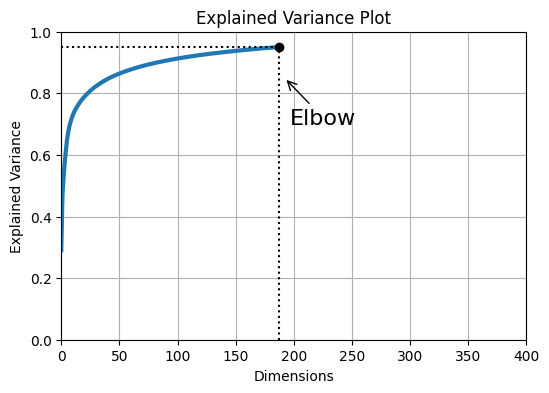

In [5]:
# Calculate cumulative sum of explained variances
cumsum = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of dimensions needed to capture 95% of the variance
d = np.argmax(cumsum >= 0.95) + 1

# Assuming we have calculated cumsum and determined the value of d
def explained_variance_plot(cumsum, d):
    plt.figure(figsize=(6, 4))
    plt.plot(cumsum, linewidth=3)
    plt.axis([0, 400, 0, 1])
    plt.xlabel("Dimensions")
    plt.ylabel("Explained Variance")
    plt.plot([d, d], [0, 0.95], "k:")
    plt.plot([0, d], [0.95, 0.95], "k:")
    plt.plot(d, 0.95, "ko")
    plt.annotate("Elbow", xy=(d + 5, 0.85), xytext=(d + 10, 0.7),
                arrowprops=dict(arrowstyle="->"), fontsize=16)
    plt.grid(True)
    plt.title("Explained Variance Plot")
    plt.show()

explained_variance_plot(cumsum, d)

### **Answer -> Random Forest**

Now I use `PCA` for each model separately

**`Random Forest Classifier`**

Make pipeline

In [6]:
#Pipeline with StandardScaler, PCA, and Random Forest Classifier
pipeline = Pipeline([
    ('std_dcaler', StandardScaler()),
    ('pca', PCA(random_state=42)),  # Use PCA for dimensionality reduction
    ('random_forest', RandomForestClassifier(random_state=42))  # Random Forest Classifier
])
pipeline

Pipeline(steps=[('std_dcaler', StandardScaler()), ('pca', PCA(random_state=42)),
                ('random_forest', RandomForestClassifier(random_state=42))])

Fitting 3 folds for each of 3 candidates, totalling 9 fits


Best Parameters : {'random_forest__n_estimators': 100, 'random_forest__max_depth': None, 'pca__n_components': 0.88}
Best Estimator : Pipeline(steps=[('std_dcaler', StandardScaler()),
                ('pca', PCA(n_components=0.88, random_state=42)),
                ('random_forest', RandomForestClassifier(random_state=42))])
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       1.00      0.95      0.97      1000
           2       0.75      0.79      0.77      1000
           3       0.86      0.89      0.87      1000
           4       0.77      0.80      0.78      1000
           5       0.93      0.92      0.92      1000
           6       0.70      0.58      0.63      1000
           7       0.92      0.93      0.92      1000
           8       0.93      0.95      0.94      1000
           9       0.92      0.95      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86 

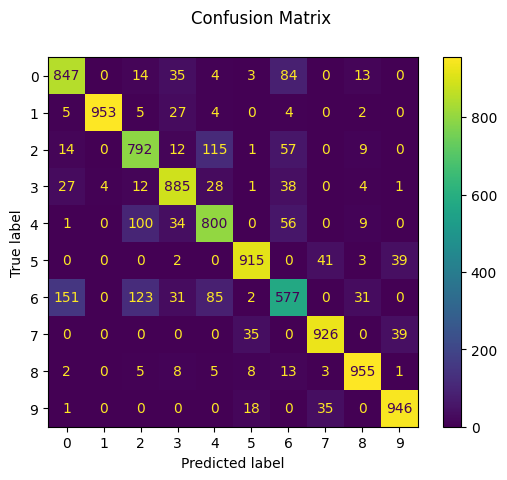

In [7]:
# Define the parameter grid for hyperparameter tuning
param_dist = {
    'pca__n_components': [0.8, 0.88, 0.95],
    'random_forest__n_estimators': [50, 100, 150],
    'random_forest__max_depth': [None, 10, 20, 30, 40, 50],
}

random_search = RandomizedSearchCV(
    pipeline, param_distributions=param_dist, n_iter=3, cv=3, n_jobs=-1, verbose=1, scoring='accuracy', random_state=42
)
random_search.fit(x_train, y_train)

# Store the best parameters and results
best_params = random_search.best_params_
print("Best Parameters :", best_params)

best_estimator = random_search.best_estimator_
print("Best Estimator :", best_estimator)

y_pred = best_estimator.predict(x_test)

# Classification report
print(classification_report(y_test, y_pred))

# Plotting confusion matrix
confussion_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
confussion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()

**Random Forest hyperparameters**

`pca__n_components`:

Minimum number of principal components necessary to explin at least of the variance in the data. It determines the dimensionality of the reduced feature space.

`RandomForest__n_estimators:` 

The number of trees in the random forest. Increasing the number of trees generally improves performance but also increases computational cost.

`RandomForest__max_depth:` 

The maximum depth of each decision tree in the forest. It controls the complexity of individual trees. A deeper tree can model more complex relationships but may lead to overfitting.

### **Answer -> KNN**

**`KNeighborsClassifier`**

In [8]:
#Pipeline with StandardScaler, PCA, and KNeighbor Classifier
knn_pipeline = Pipeline([
    ('std_dcaler', StandardScaler()),
    ('pca', PCA(random_state=42)),  # Use PCA for dimensionality reduction
    ('knn', KNeighborsClassifier())  # Random Forest Classifier
])
knn_pipeline

Pipeline(steps=[('std_dcaler', StandardScaler()), ('pca', PCA(random_state=42)),
                ('knn', KNeighborsClassifier())])

Best Parameters : {'pca__n_components': 0.95, 'knn__weights': 'uniform', 'knn__n_neighbors': 5}
Best Estimator : Pipeline(steps=[('std_dcaler', StandardScaler()),
                ('pca', PCA(n_components=0.95, random_state=42)),
                ('knn', KNeighborsClassifier())])
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.76      0.79      0.77      1000
           3       0.89      0.86      0.88      1000
           4       0.76      0.79      0.77      1000
           5       0.98      0.88      0.93      1000
           6       0.65      0.58      0.61      1000
           7       0.90      0.95      0.93      1000
           8       0.98      0.94      0.96      1000
           9       0.91      0.96      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg     

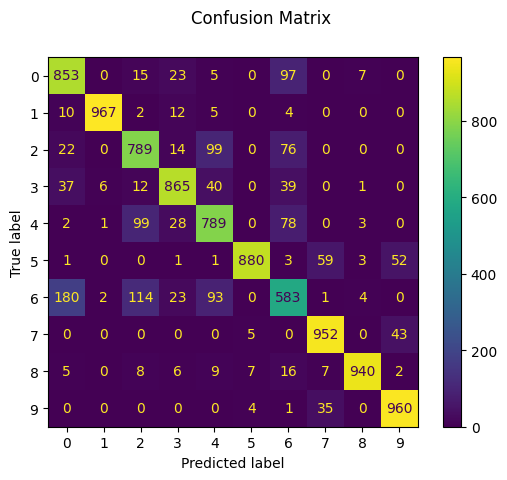

In [9]:
# Define the parameter grid for hyperparameter tuning
knn_param_dist = {
    'pca__n_components': [0.8, 0.88, 0.95],  # Number of components after PCA
    'knn__n_neighbors': [3, 5, 7],  # Number of neighbors to consider
    'knn__weights': ['uniform', 'distance'],  # Weight function used in prediction
}

# Use RandomizedSearchCV for hyperparameter tuning
knn_random_search = RandomizedSearchCV(knn_pipeline, knn_param_dist, n_iter=5, cv=3, scoring='accuracy', random_state=42)
knn_random_search.fit(x_train, y_train)

# Store the best parameters and results
knn_best_params = knn_random_search.best_params_
print("Best Parameters :", knn_best_params)

knn_best_estimator = knn_random_search.best_estimator_
print("Best Estimator :", knn_best_estimator)

y_pred = knn_best_estimator.predict(x_test)

# Classification report
print(classification_report(y_test, y_pred))

# Plotting confusion matrix
confussion_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
confussion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()

**KNN hyperparameters**

`pca__n_components`:

Same as above

`knn__n_neighbors` :

The number of neighbors to consider when making predictions. It influences the decision boundary and the smoothness of the model.

`knn__weights` :

The weight function used in prediction. It can be `uniform` (all neighbors have equal weight) or `distance` (closer neighbors have more influence).

### **Answer -> Decision Tree**

**`DecisionTreeClassifier`**

In [10]:
#Pipeline with StandardScaler, PCA, and Decission Tree Classifier
dtree_pipeline = Pipeline([
    ('std_dcaler', StandardScaler()),
    ('pca', PCA(random_state=42)),  # Use PCA for dimensionality reduction
    ('dtree', DecisionTreeClassifier(random_state=42))  #Decission Tree Classifier
])
dtree_pipeline

Pipeline(steps=[('std_dcaler', StandardScaler()), ('pca', PCA(random_state=42)),
                ('dtree', DecisionTreeClassifier(random_state=42))])

Best Parameters : {'pca__n_components': 0.8, 'dtree__min_samples_split': 5, 'dtree__max_depth': 20}
Best Estimator : Pipeline(steps=[('std_dcaler', StandardScaler()),
                ('pca', PCA(n_components=0.8, random_state=42)),
                ('dtree',
                 DecisionTreeClassifier(max_depth=20, min_samples_split=5,
                                        random_state=42))])
              precision    recall  f1-score   support

           0       0.72      0.71      0.72      1000
           1       0.95      0.94      0.95      1000
           2       0.66      0.66      0.66      1000
           3       0.79      0.79      0.79      1000
           4       0.67      0.67      0.67      1000
           5       0.85      0.84      0.85      1000
           6       0.52      0.53      0.52      1000
           7       0.84      0.84      0.84      1000
           8       0.91      0.89      0.90      1000
           9       0.87      0.89      0.88      1000

    accurac

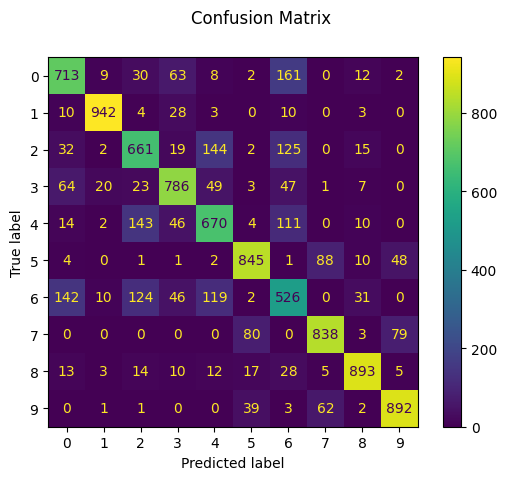

In [11]:
# Define the parameter grid for hyperparameter tuning
dtree_param_dist = {
    'pca__n_components': [0.8, 0.88, 0.95],  # Number of components after PCA
    'dtree__max_depth': [None, 10, 20],  # Maximum depth of the decision tree
    'dtree__min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
}

# Use RandomizedSearchCV for hyperparameter tuning
dtree_random_search = RandomizedSearchCV(dtree_pipeline, dtree_param_dist, n_iter=5, cv=3, scoring='accuracy', random_state=42)
dtree_random_search.fit(x_train, y_train)

# Store the best parameters and results
dtree_best_params = dtree_random_search.best_params_
print("Best Parameters :", dtree_best_params)

dtree_best_estimator = dtree_random_search.best_estimator_
print("Best Estimator :", dtree_best_estimator)

y_pred = dtree_best_estimator.predict(x_test)

# Classification report
print(classification_report(y_test, y_pred))

# Plotting confusion matrix
confussion_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
confussion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()

**Decision Tree hyperparameters**

`dtree__max_depth`: 

The max_depth hyperparameter determines the maximum depth of the decision tree. A higher max_depth allows the tree to capture more complex patterns but also increases the risk of overfitting.

`dtree__min_samples_split`: 

The minimum number of samples required to split an internal node. It controls the minimum size of a node, preventing the creation of nodes with too few samples.

### **Answer -> AdaBoost**

**`AdaBoost Classifier`**

In [12]:
#Pipeline with StandardScaler, PCA, and AdaBoost Classifier
adaboost_pipeline = Pipeline([
    ('std_dcaler', StandardScaler()),
    ('pca', PCA(random_state=42)),  # Use PCA for dimensionality reduction
    ('adaboost', AdaBoostClassifier(random_state=42))  #AdaBoost Classifier
])
adaboost_pipeline

Pipeline(steps=[('std_dcaler', StandardScaler()), ('pca', PCA(random_state=42)),
                ('adaboost', AdaBoostClassifier(random_state=42))])

Best Parameters : {'pca__n_components': 0.88, 'adaboost__n_estimators': 100, 'adaboost__learning_rate': 0.1}
Best Estimator : Pipeline(steps=[('std_dcaler', StandardScaler()),
                ('pca', PCA(n_components=0.88, random_state=42)),
                ('adaboost',
                 AdaBoostClassifier(learning_rate=0.1, n_estimators=100,
                                    random_state=42))])


d:\Teias\Usage\Term-1\Machine Learning\Assignments\env\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Teias\Usage\Term-1\Machine Learning\Assignments\env\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Teias\Usage\Term-1\Machine Learning\Assignments\env\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

           0       0.79      0.65      0.71      1000
           1       0.00      0.00      0.00      1000
           2       0.42      0.59      0.49      1000
           3       0.39      0.85      0.53      1000
           4       0.47      0.37      0.42      1000
           5       0.66      0.82      0.73      1000
           6       0.29      0.23      0.25      1000
           7       0.78      0.55      0.64      1000
           8       0.84      0.81      0.83      1000
           9       0.80      0.89      0.84      1000

    accuracy                           0.58     10000
   macro avg       0.54      0.58      0.55     10000
weighted avg       0.54      0.58      0.55     10000



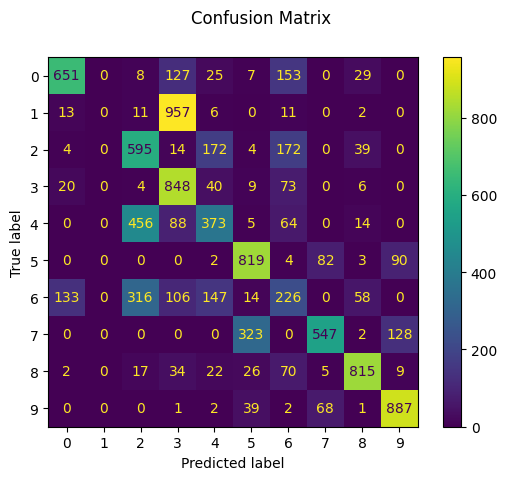

In [13]:
# Define parameter distributions for both PCA and AdaBoostClassifier
adaboost_param_dist = {
    'pca__n_components': [0.8, 0.88, 0.95],  # Number of components after PCA
    'adaboost__n_estimators': [50, 100, 200],  # Number of weak learners (usually decision trees)
    'adaboost__learning_rate': [0.01, 0.1, 1.0],  # Weight applied to each weak learner
}

# Use RandomizedSearchCV for hyperparameter tuning
adaboost_random_search = RandomizedSearchCV(adaboost_pipeline, adaboost_param_dist, n_iter=5, cv=3, scoring='accuracy', random_state=42)
adaboost_random_search.fit(x_train, y_train)

# Store the best parameters and results
adaboost_best_params = adaboost_random_search.best_params_
print("Best Parameters :", adaboost_best_params)

adaboost_best_estimator = adaboost_random_search.best_estimator_
print("Best Estimator :", adaboost_best_estimator)

y_pred = adaboost_best_estimator.predict(x_test)

# Classification report
print(classification_report(y_test, y_pred, zero_division='warn'))

# Plotting confusion matrix
confussion_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
confussion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()

The complexity and high dimensionality of image data might not be well-suited for the simple weak learners used in AdaBoost, especially if the weak learners are shallow decision trees.

**AdaBoost hyperparameters**

`adaboost__n_estimators`: 

The number of weak learners (typically decision trees) to train in the ensemble.

`adaboost__learning_rate`: 

A factor to shrink the contribution of each weak learner. Lower values encourage more contribution from each learner.

<hr>

**Comparison beetwen above algorithms (With using of PCA)**

1. **Complexity of Decision Boundaries:**
   - Fashion-MNIST consists of images of clothing items, and the decision boundaries between different classes might be complex. k-Nearest Neighbors and Random Forests are capable of capturing complex decision boundaries, which can be advantageous for image classification tasks.

2. **Ensemble Methods vs. Individual Trees:**
   - Random Forest is an ensemble method that builds multiple decision trees and combines their predictions. This ensemble approach often leads to more robust and accurate models compared to individual decision trees. AdaBoost also combines weak learners, but its performance can be more sensitive to the choice of weak learners.

3. **Nearest Neighbor Approach of KNN:**
   - k-Nearest Neighbors relies on the similarity of instances in the feature space. For image data, the nearest neighbor approach can be effective in capturing local patterns and relationships between pixels.

4. **Dimensionality of Fashion-MNIST:**
   - Fashion-MNIST images have a relatively low resolution (28x28 pixels), resulting in a moderate-dimensional feature space. While Random Forests and KNN can perform well in moderate-dimensional spaces, AdaBoost may face challenges with high-dimensional data without additional feature engineering.

5. **Sensitivity to Hyperparameters:**
   - The performance of AdaBoost and Decision Trees can be sensitive to hyperparameters such as the number of weak learners, learning rate, and tree depth. Suboptimal hyperparameter choices may impact their performance.

7. **Suitability for Image Data:**
   - k-Nearest Neighbors and Random Forests are known to be versatile and effective for image classification tasks. Their ability to capture spatial relationships and hierarchical features in images could contribute to their high accuracy on Fashion-MNIST.

<hr>


**Why number of PCA dimension is diffrent on each model ?**

The number of dimensions (features) after applying PCA can vary across different machine learning models:

1. **Explained Variance Threshold:**
   - When performing PCA, we often specify the desired level of explained variance to retain. For example, if we set the explained variance threshold to 95%, PCA will retain enough principal components to explain 95% of the variance in the original data. Different models may require a different number of principal components to achieve the specified level of variance.

2. **Model-Specific Sensitivity to Dimensions:**
   - Different machine learning models have varying sensitivity to the number of dimensions. Some models may require more dimensions to effectively capture the underlying patterns in the data, while others may be more robust with fewer dimensions.

3. **Inherent Characteristics of the Data:**
   - The Fashion-MNIST dataset may exhibit unique characteristics that affect how well it can be represented in a lower-dimensional space. Models may respond differently to the reduced feature space based on the inherent structure of the data.

4. **Model Complexity and Flexibility:**
   - More complex models may require a higher-dimensional representation to capture intricate patterns, while simpler models may be more efficient with fewer dimensions. For example, an intricate decision boundary may be better captured with a higher number of principal components.

When applying PCA within a pipeline for different models, it's common to observe variations in the number of retained dimensions. This variability is normal and is often a consequence of the interplay between the specific model, the dataset, and the parameters chosen for PCA. Experimenting with different hyperparameters, explained variance thresholds, and model-specific settings can help find the most suitable configuration for each model.

### **Answer -> Implementation without PCA**

**`All Algorithms without using PCA`**

In bottom part i create all 4 classifiers then do hyperparameter tuning for each one , after it the result of each classifier is better than results of previous part.

The performance of `PCA` in combination with a classifier can vary based on the characteristics of our dataset and the specific algorithm we are using. While `PCA` is a powerful technique for dimensionality reduction and feature extraction, there are cases where it may not always lead to improved performance. Here are some reasons why we might observe better accuracy without using `PCA`:

1. **Information Loss:** PCA works by projecting the data onto a lower-dimensional subspace while retaining as much variance as possible. However, this process inherently involves some information loss. In certain cases, the relevant information for the classification task may be lost, leading to a decrease in accuracy.

2. **Linear Transformation:** `PCA` assumes that the underlying relationships in the data are linear. If our data has nonlinear structures that are important for the classification task, `PCA` may not effectively capture them. In such cases, a classifier without `PCA` might perform better.

3. **Algorithm Sensitivity:** Different machine learning algorithms respond differently to the application of `PCA`. Some algorithms may benefit from dimensionality reduction, while others may not. The choice of the classifier may influence whether `PCA` improves or degrades performance.

4. **Hyperparameter Tuning:** The performance of machine learning algorithms often depends on hyperparameter settings. It's possible that the hyperparameters were not tuned optimally for the combination of `PCA` and the classifier, leading to suboptimal results.

5. **Overfitting:** While `PCA` can help in reducing the risk of overfitting by removing noise and irrelevant dimensions, there are cases where it might remove too much information, leading to underfitting.

Random Forest:
Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': False}
Accuracy: 0.8795
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.99      0.96      0.98      1000
           2       0.77      0.80      0.79      1000
           3       0.88      0.90      0.89      1000
           4       0.77      0.83      0.80      1000
           5       0.98      0.96      0.97      1000
           6       0.73      0.60      0.66      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.98      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000




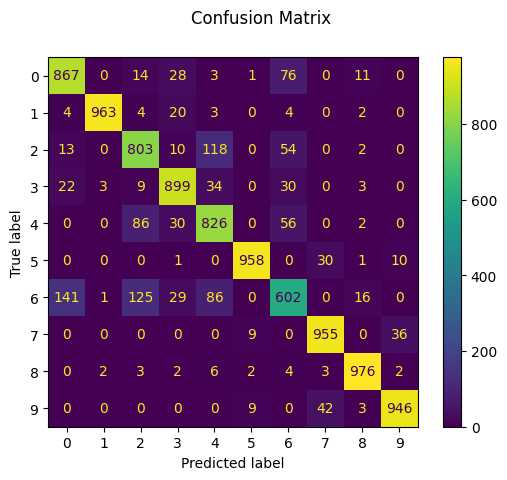

K-Nearest Neighbors:
Best Parameters: {'weights': 'distance', 'n_neighbors': 7, 'leaf_size': 40}
Accuracy: 0.8541
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.74      0.80      0.77      1000
           3       0.91      0.87      0.89      1000
           4       0.78      0.77      0.78      1000
           5       1.00      0.80      0.89      1000
           6       0.63      0.60      0.62      1000
           7       0.87      0.96      0.91      1000
           8       0.97      0.95      0.96      1000
           9       0.88      0.97      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000




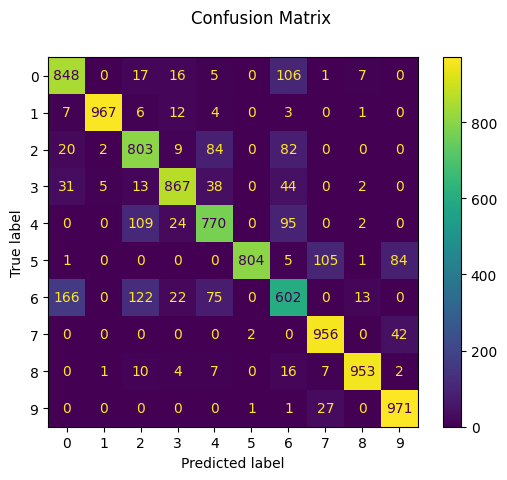

Decision Tree:
Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}
Accuracy: 0.8009
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78      1000
           1       0.97      0.92      0.95      1000
           2       0.64      0.67      0.65      1000
           3       0.82      0.81      0.81      1000
           4       0.60      0.73      0.66      1000
           5       0.94      0.87      0.90      1000
           6       0.57      0.50      0.53      1000
           7       0.87      0.93      0.90      1000
           8       0.93      0.90      0.91      1000
           9       0.92      0.91      0.91      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000




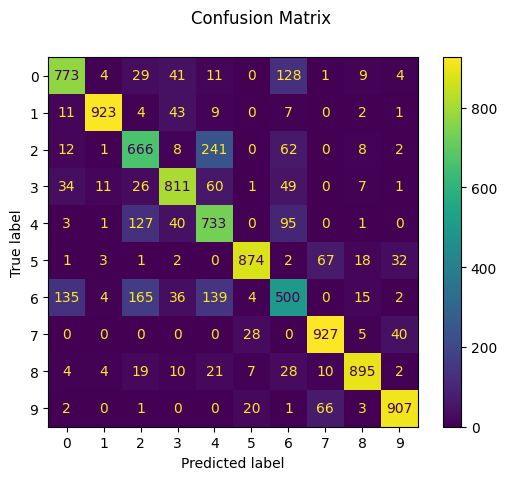

d:\Teias\Usage\Term-1\Machine Learning\Assignments\env\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\Teias\Usage\Term-1\Machine Learning\Assignments\env\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\Teias\Usage\Term-1\Machine Learning\Assignments\env\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\Teias\Usage\Term-1\Machine Learning\Assignments\env\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\Teias\Usage\Term-1\Machine Learning\Assignments\env\Lib\site-packages\sklearn\ensemble\_base.py:156: Futu

AdaBoost:
Best Parameters: {'n_estimators': 100, 'learning_rate': 1.0}
Accuracy: 0.7929
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.73      0.75      1000
           1       0.96      0.95      0.96      1000
           2       0.63      0.66      0.64      1000
           3       0.83      0.79      0.81      1000
           4       0.65      0.64      0.65      1000
           5       0.92      0.89      0.90      1000
           6       0.53      0.56      0.54      1000
           7       0.87      0.89      0.88      1000
           8       0.90      0.91      0.91      1000
           9       0.90      0.91      0.90      1000

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000




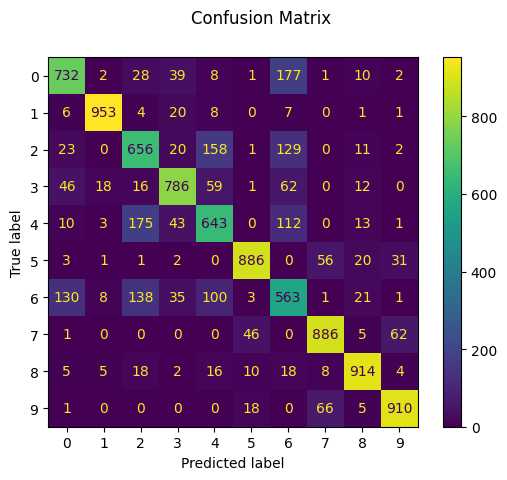

In [16]:
# Function for displaying results
def display_results(model_name, best_params, accuracy, classification_report, y_test, y_pred):
    print(f"{model_name}:")
    print(f"Best Parameters: {best_params}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report)
    print()
    # Plotting confusion matrix
    confussion_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    confussion_matrix.figure_.suptitle("Confusion Matrix")
    plt.show()

# RandomForestClassifier
rf_param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_classifier = RandomForestClassifier(random_state=42)
rf_random_search = RandomizedSearchCV(rf_classifier, rf_param_dist, n_iter=5, cv=5, scoring='accuracy', random_state=42)
rf_random_search.fit(x_train, y_train)
rf_best_params = rf_random_search.best_params_
rf_best_model = rf_random_search.best_estimator_
rf_y_pred = rf_best_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_classification_report = classification_report(y_test, rf_y_pred)

# Display results for RandomForestClassifier
display_results("Random Forest", rf_best_params, rf_accuracy, rf_classification_report, y_test, rf_y_pred)

# KNeighborsClassifier
knn_param_dist = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'leaf_size': [10, 20, 30, 40]
}

knn_classifier = KNeighborsClassifier()
knn_random_search = RandomizedSearchCV(knn_classifier, knn_param_dist, n_iter=5, cv=5, scoring='accuracy', random_state=42)
knn_random_search.fit(x_train, y_train)
knn_best_params = knn_random_search.best_params_
knn_best_model = knn_random_search.best_estimator_
knn_y_pred = knn_best_model.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_classification_report = classification_report(y_test, knn_y_pred)

# Display results for KNeighborsClassifier
display_results("K-Nearest Neighbors", knn_best_params, knn_accuracy, knn_classification_report, y_test, knn_y_pred)

# DecisionTreeClassifier
dtree_param_dist = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dtree_classifier = DecisionTreeClassifier(random_state=42)
dtree_random_search = RandomizedSearchCV(dtree_classifier, dtree_param_dist, n_iter=5, cv=5, scoring='accuracy', random_state=42)
dtree_random_search.fit(x_train, y_train)
dtree_best_params = dtree_random_search.best_params_
dtree_best_model = dtree_random_search.best_estimator_
dtree_y_pred = dtree_best_model.predict(x_test)
dtree_accuracy = accuracy_score(y_test, dtree_y_pred)
dtree_classification_report = classification_report(y_test, dtree_y_pred)

# Display results for DecisionTreeClassifier
display_results("Decision Tree", dtree_best_params, dtree_accuracy, dtree_classification_report, y_test, dtree_y_pred)

# AdaBoostClassifier
adaboost_param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}

adaboost_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42), random_state=42)
adaboost_random_search = RandomizedSearchCV(adaboost_classifier, adaboost_param_dist, n_iter=5, cv=5, scoring='accuracy', random_state=42)
adaboost_random_search.fit(x_train, y_train)
adaboost_best_params = adaboost_random_search.best_params_
adaboost_best_model = adaboost_random_search.best_estimator_
adaboost_y_pred = adaboost_best_model.predict(x_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_y_pred)
adaboost_classification_report = classification_report(y_test, adaboost_y_pred)

# Display results for AdaBoostClassifier
display_results("AdaBoost", adaboost_best_params, adaboost_accuracy, adaboost_classification_report, y_test, adaboost_y_pred)

<hr>

## <font color='#D61E85' size='+3'>**Q2:**</font> <font size='+2'> **Randomized PCA** </font>

In this question we want to check the time complexity of finding an approximation of the first $d$ principal components. Also, we want to see how is the performance of it in compare to the original PCA. In order to make this happen there is a stochastic algorithm called *randomized PCA* which has a faster procedure to find the first $d$ principal components.

By default, the `svd_solver` parameter of PCA in Scikit-learn is set to `"auto"`. It means that it automatically determine to use `"full"` or `"randomized"` to find the principal components. Base on our text book:

"Scikit-learn uses the randomized PCA algorithm if $max(m, n) > 500$ and `n_components` is an integer smaller than $80\%$ of $min(m,n)$, or else it uses the full SVD approach"

<font size='+1'>**(a)**</font> For previous question you found $d$ components for each one of the classifiers.This time try to perform PCA without considering the classifier and just by determining the number of components. For the `svd_solver`, this time use both `"full"` and `"randomized"` arguments separately and compare the results of them. Also compare the running time of `"full"` and `"randomized"` for each one of the classifiers. Explain your observations. You should perform following steps one-by-one for each classifier:

*   Perform PCA for both `"full"` and `"randomized"`. Repoert the time of performing them.

*   For both cases fit the new training data (after dimensionality reduction) to the classifier. Then report the results (Accuracy, F1-score, ...) on test set.

<font size='+1'>**(b)**</font> This time consider the $d=10$ and compare the running times for both `"full"` and `"randomized"` arguments. Explain your observations.

<font size='+1'>**(c)**</font> There is something called Incremental PCA (IPCA), explain what is it and in what situations it is useful?

<font size='+1'>**(d)**</font> Consider the number of batches equal to $200$ and perform the IPCA.

<hr>

### **Answer -> Part(A)**

**Number of Components obtained based on previous part (the amount of variance that needs to be explained)**

for example if n_components=0.95, the algorithm will select the number of components while preserving 95% of the variance in the data.

***Decision Tree :*** `0.8`

***AdaBoost :*** `0.88`

***Random Forest :*** `0.88`

***KNN :*** `0.95`

Now i will implement `PCA` without hyperparameter tuning (for both `svd_solver` parameters (`full` and `randomized`))

<font color='#8FCF26' size='+2'>**A2:**</font> Your explanations

**`PCA` implementation without using any classifier algorithms**

**Load Data**

In [8]:
# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Train data Shape :", x_train.shape)
print("Train data Shape :", x_test.shape)

# Flatten the images to 1D arrays
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Print the shapes of the flattened arrays
print("Train data Shape after reshapre:", x_train.shape)
print("Test data Shape after reshape  :", x_test.shape)

Train data Shape : (60000, 28, 28)
Train data Shape : (10000, 28, 28)
Train data Shape after reshapre: (60000, 784)
Test data Shape after reshape  : (10000, 784)


**Now implement PCA with 0.95 of variance**

In [9]:
import time

# Full SVD Solver
start_time_full = time.time()
pca_full = PCA(n_components=0.95, svd_solver='full')
X_train_pca_full = pca_full.fit_transform(x_train)
X_test_pca_full = pca_full.transform(x_test)
end_time_full = time.time()

print("Full PCA Runing Time :",end_time_full - start_time_full)
print("Number of Components (Full PCA):", pca_full.n_components_)

# Randomized SVD Solver
start_time_randomized = time.time()
pca_randomized = PCA(n_components=pca_full.n_components_, svd_solver='randomized')
X_train_pca_randomized = pca_randomized.fit_transform(x_train)
X_test_pca_randomized = pca_randomized.transform(x_test)
end_time_randomized = time.time()

print("Randomized PCA Runing Time :",end_time_randomized - start_time_randomized)
print("Number of Components (Randomized PCA):", pca_randomized.n_components_)

Full PCA Runing Time : 7.4154744148254395
Number of Components (Full PCA): 187
Randomized PCA Runing Time : 5.2268900871276855
Number of Components (Randomized PCA): 187


The above result showed that the randomized PCA Runing time decreased with constant number of Components .

`randomized` PCA is faster, it provides an approximation of the principal components. The level of approximation depends on the number of iterations and the random sampling strategy. In practice, the speed gain may outweigh the small loss in precision, especially when dealing with large datasets.

In contrast, `full` PCA computes the exact principal components, but it can be computationally expensive, especially for high-dimensional data. The choice between the two methods depends on the trade-off between computation time and precision that is acceptable for our dataset.

**Now implement PCA with each one of above classifiers (for both randomized and full svd_solver)**

for this part i create a pipeline for each one of the classifiers and then compare the Accuracy of each PCA (based on svd_solver)

**`Decision Tree (svd_solver = 'full') , n_components = 0.8`**

Calculate number of components based on threshold

In [34]:
pca = PCA(random_state=42, n_components=0.8)
X_train_pca_full = pca.fit_transform(x_train)
X_test_pca_full = pca.transform(x_test)
pca.n_components_

24

In [35]:
#Pipeline with StandardScaler, PCA, and Decission Tree Classifier - full(svd_solver)
dtree_pipeline_full = Pipeline([
    ('std_dcaler', StandardScaler()),
    ('pca', PCA(random_state=42, svd_solver='full', n_components=pca.n_components_)),  # Use PCA for dimensionality reduction
    ('dtree', DecisionTreeClassifier(random_state=42))  #Decission Tree Classifier
])
dtree_pipeline_full

Pipeline(steps=[('std_dcaler', StandardScaler()),
                ('pca',
                 PCA(n_components=24, random_state=42, svd_solver='full')),
                ('dtree', DecisionTreeClassifier(random_state=42))])

In [36]:
start_time_full = time.time()

# Train the pipeline on the training data
dtree_pipeline_full.fit(x_train, y_train)

# Make predictions on the test set
y_pred = dtree_pipeline_full.predict(x_test)

end_time_full = time.time()
print("Full PCA Runing Time :", end_time_full - start_time_full)

Full PCA Runing Time : 14.933010339736938


              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1000
           1       0.95      0.94      0.95      1000
           2       0.64      0.63      0.64      1000
           3       0.79      0.77      0.78      1000
           4       0.65      0.64      0.64      1000
           5       0.86      0.82      0.84      1000
           6       0.48      0.51      0.49      1000
           7       0.83      0.85      0.84      1000
           8       0.90      0.90      0.90      1000
           9       0.87      0.89      0.87      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



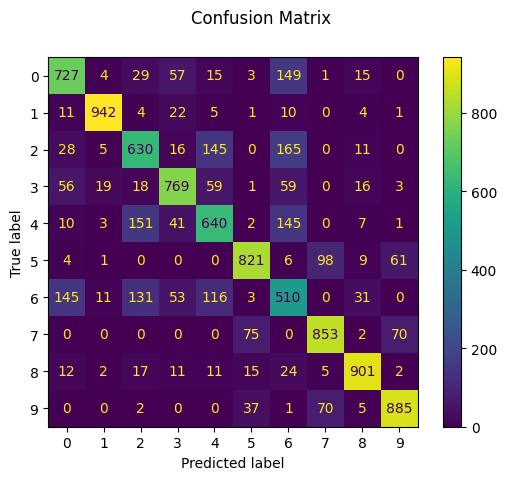

In [37]:
# Classification report
print(classification_report(y_test, y_pred))

# Plotting confusion matrix
confussion_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
confussion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()

**`Decision Tree (svd_solver = 'randomized') , n_components = 0.8`**

In [38]:
#Pipeline with StandardScaler, PCA, and Decission Tree Classifier - randomized(svd_solver)
dtree_pipeline_randomized = Pipeline([
    ('std_dcaler', StandardScaler()),
    ('pca', PCA(random_state=42, svd_solver='randomized', n_components=pca.n_components_)),  # Use PCA for dimensionality reduction
    ('dtree', DecisionTreeClassifier(random_state=42))  #Decission Tree Classifier
])
dtree_pipeline_randomized

Pipeline(steps=[('std_dcaler', StandardScaler()),
                ('pca',
                 PCA(n_components=24, random_state=42,
                     svd_solver='randomized')),
                ('dtree', DecisionTreeClassifier(random_state=42))])

In [39]:
start_time_full = time.time()

# Train the pipeline on the training data
dtree_pipeline_randomized.fit(x_train, y_train)

# Make predictions on the test set
y_pred = dtree_pipeline_randomized.predict(x_test)

end_time_full = time.time()
print("Randomized PCA Runing Time :", end_time_full - start_time_full)

Randomized PCA Runing Time : 11.23741888999939


              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1000
           1       0.94      0.95      0.94      1000
           2       0.65      0.65      0.65      1000
           3       0.79      0.77      0.78      1000
           4       0.63      0.63      0.63      1000
           5       0.86      0.83      0.84      1000
           6       0.48      0.51      0.50      1000
           7       0.84      0.84      0.84      1000
           8       0.90      0.90      0.90      1000
           9       0.86      0.88      0.87      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



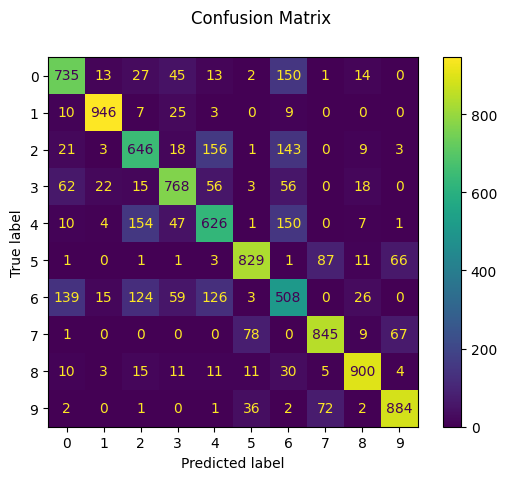

In [40]:
# Classification report
print(classification_report(y_test, y_pred))

# Plotting confusion matrix
confussion_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
confussion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()

**Explain Result**

Based on above results the running time of `Randomized` PCA decreased based on the `Full` PCA

but the accuracy is approximately equal. (Maybe it's related to classification algorithm)

<hr>

**`Random Forest (svd_solver = 'full') , n_components = 0.88`**

Calculate number of components based on threshold

In [47]:
pca = PCA(random_state=42, n_components=0.88)
X_train_pca_full = pca.fit_transform(x_train)
X_test_pca_full = pca.transform(x_test)
pca.n_components_

63

In [48]:
#Pipeline with StandardScaler, PCA, and Random Forest - full(svd_solver)
rf_classifier_pipeline_full = Pipeline([
    ('std_dcaler', StandardScaler()),
    ('pca', PCA(random_state=42, svd_solver='full', n_components=pca.n_components_)),  # Use PCA for dimensionality reduction
    ('rf', RandomForestClassifier(random_state=42))  #RandomForestClassifier Classifier
])
rf_classifier_pipeline_full

Pipeline(steps=[('std_dcaler', StandardScaler()),
                ('pca',
                 PCA(n_components=63, random_state=42, svd_solver='full')),
                ('rf', RandomForestClassifier(random_state=42))])

In [49]:
start_time_full = time.time()

# Train the pipeline on the training data
rf_classifier_pipeline_full.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier_pipeline_full.predict(x_test)

end_time_full = time.time()
print("Full PCA Runing Time :", end_time_full - start_time_full)

Full PCA Runing Time : 159.43845963478088


              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1000
           1       0.99      0.95      0.97      1000
           2       0.77      0.79      0.78      1000
           3       0.86      0.89      0.88      1000
           4       0.78      0.80      0.79      1000
           5       0.93      0.92      0.93      1000
           6       0.69      0.58      0.63      1000
           7       0.91      0.92      0.92      1000
           8       0.93      0.96      0.95      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



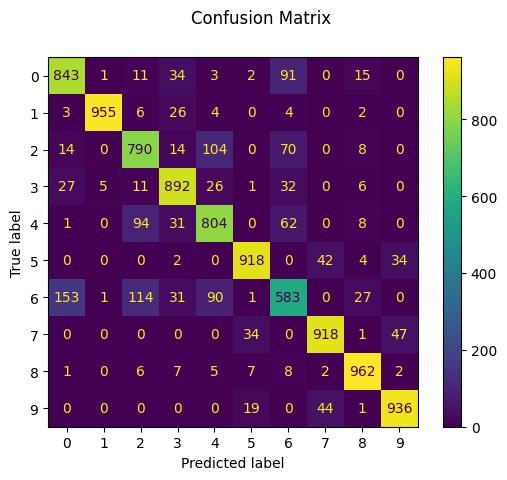

In [50]:
# Classification report
print(classification_report(y_test, y_pred))

# Plotting confusion matrix
confussion_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
confussion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()

**`Random Forest (svd_solver = 'randomized') , n_components = 0.88`**

In [51]:
#Pipeline with StandardScaler, PCA, and Random Forest - randomized(svd_solver)
rf_classifier_pipeline_randomized = Pipeline([
    ('std_dcaler', StandardScaler()),
    ('pca', PCA(random_state=42, svd_solver='randomized', n_components=pca.n_components_)),  # Use PCA for dimensionality reduction
    ('rf', RandomForestClassifier(random_state=42))  #RandomForestClassifier Classifier
])
rf_classifier_pipeline_randomized

Pipeline(steps=[('std_dcaler', StandardScaler()),
                ('pca',
                 PCA(n_components=63, random_state=42,
                     svd_solver='randomized')),
                ('rf', RandomForestClassifier(random_state=42))])

In [52]:
start_time_full = time.time()

# Train the pipeline on the training data
rf_classifier_pipeline_randomized.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier_pipeline_randomized.predict(x_test)

end_time_full = time.time()
print("Randomized PCA Runing Time :", end_time_full - start_time_full)

Randomized PCA Runing Time : 157.85465383529663


              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.77      0.79      0.78      1000
           3       0.85      0.89      0.87      1000
           4       0.78      0.80      0.79      1000
           5       0.93      0.91      0.92      1000
           6       0.68      0.58      0.62      1000
           7       0.91      0.91      0.91      1000
           8       0.93      0.96      0.94      1000
           9       0.91      0.94      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



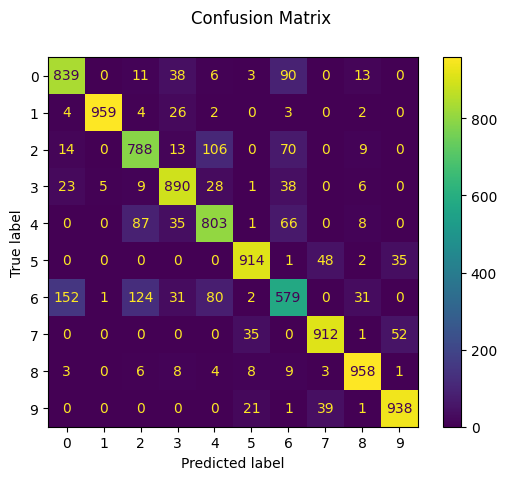

In [53]:
# Classification report
print(classification_report(y_test, y_pred))

# Plotting confusion matrix
confussion_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
confussion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()

**Explain Result**

Based on above results the running time of `Randomized` is approximately equal `Full` PCA .(Maybe it's related to classification algorithm)

but the accuracy is approximately equal. (Maybe it's related to classification algorithm)

<hr>

**`AdaBoost (svd_solver = 'full') , n_components = 0.88`**

In [54]:
#Pipeline with StandardScaler, PCA, and Random Forest - full(svd_solver)
adaboost_classifier_pipeline_full = Pipeline([
    ('std_dcaler', StandardScaler()),
    ('pca', PCA(random_state=42, svd_solver='full', n_components=pca.n_components_)),  # Use PCA for dimensionality reduction
    ('adaboost', AdaBoostClassifier(random_state=42))  #RandomForestClassifier Classifier
])
adaboost_classifier_pipeline_full

Pipeline(steps=[('std_dcaler', StandardScaler()),
                ('pca',
                 PCA(n_components=63, random_state=42, svd_solver='full')),
                ('adaboost', AdaBoostClassifier(random_state=42))])

In [55]:
start_time_full = time.time()

# Train the pipeline on the training data
adaboost_classifier_pipeline_full.fit(x_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier_pipeline_full.predict(x_test)

end_time_full = time.time()
print("Full PCA Runing Time :", end_time_full - start_time_full)

Full PCA Runing Time : 79.81967401504517


              precision    recall  f1-score   support

           0       0.69      0.54      0.61      1000
           1       0.82      0.39      0.53      1000
           2       0.50      0.50      0.50      1000
           3       0.44      0.80      0.57      1000
           4       0.46      0.59      0.52      1000
           5       0.71      0.70      0.71      1000
           6       0.28      0.15      0.19      1000
           7       0.62      0.75      0.68      1000
           8       0.86      0.90      0.88      1000
           9       0.83      0.70      0.76      1000

    accuracy                           0.60     10000
   macro avg       0.62      0.60      0.59     10000
weighted avg       0.62      0.60      0.59     10000



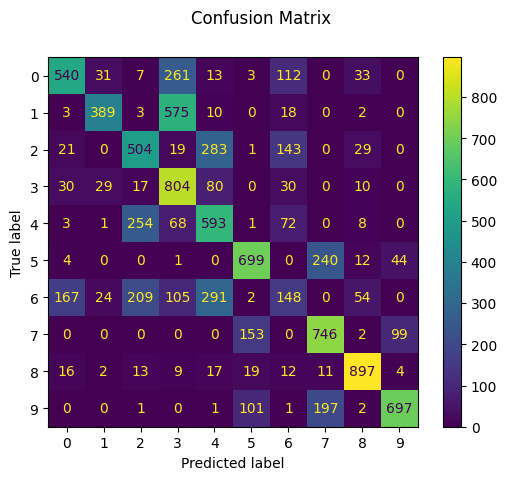

In [56]:
# Classification report
print(classification_report(y_test, y_pred))

# Plotting confusion matrix
confussion_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
confussion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()

**`AdaBoost (svd_solver = 'randomized') , n_components = 0.88`**

In [57]:
#Pipeline with StandardScaler, PCA, and Random Forest - full(svd_solver)
adaboost_classifier_pipeline_randomized = Pipeline([
    ('std_dcaler', StandardScaler()),
    ('pca', PCA(random_state=42, svd_solver='randomized', n_components=pca.n_components_)),  # Use PCA for dimensionality reduction
    ('adaboost', AdaBoostClassifier(random_state=42))  #RandomForestClassifier Classifier
])
adaboost_classifier_pipeline_randomized

Pipeline(steps=[('std_dcaler', StandardScaler()),
                ('pca',
                 PCA(n_components=63, random_state=42,
                     svd_solver='randomized')),
                ('adaboost', AdaBoostClassifier(random_state=42))])

In [58]:
start_time_full = time.time()

# Train the pipeline on the training data
adaboost_classifier_pipeline_randomized.fit(x_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier_pipeline_randomized.predict(x_test)

end_time_full = time.time()
print("Randomized PCA Runing Time :", end_time_full - start_time_full)

Randomized PCA Runing Time : 75.95454597473145


              precision    recall  f1-score   support

           0       0.71      0.64      0.67      1000
           1       0.76      0.76      0.76      1000
           2       0.49      0.50      0.50      1000
           3       0.52      0.60      0.56      1000
           4       0.46      0.57      0.51      1000
           5       0.72      0.72      0.72      1000
           6       0.30      0.18      0.22      1000
           7       0.66      0.81      0.73      1000
           8       0.86      0.89      0.87      1000
           9       0.88      0.71      0.78      1000

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.63     10000
weighted avg       0.64      0.64      0.63     10000



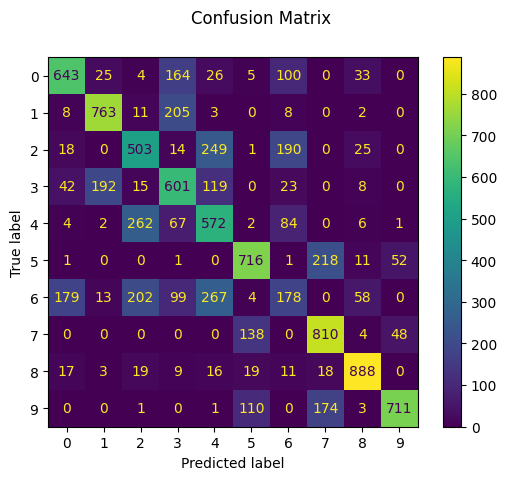

In [59]:
# Classification report
print(classification_report(y_test, y_pred))

# Plotting confusion matrix
confussion_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
confussion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()

**Explain Result**

Based on above results the running time of `Randomized` is decreased(4 seconds) based pm `Full` PCA.

but the accuracy is approximately equal. (Maybe it's related to classification algorithm)

<hr>

**`KNN (svd_solver = 'full') , n_components = 0.95`**

Calculate number of components based on threshold

In [60]:
pca = PCA(random_state=42, n_components=0.95)
X_train_pca_full = pca.fit_transform(x_train)
X_test_pca_full = pca.transform(x_test)
pca.n_components_

187

In [61]:
#Pipeline with StandardScaler, PCA, and KNN - full(svd_solver)
knn_classifier_pipeline_full = Pipeline([
    ('std_dcaler', StandardScaler()),
    ('pca', PCA(random_state=42, svd_solver='full', n_components=pca.n_components_)),  # Use PCA for dimensionality reduction
    ('knn', KNeighborsClassifier())  #KNN Classifier
])
knn_classifier_pipeline_full

Pipeline(steps=[('std_dcaler', StandardScaler()),
                ('pca',
                 PCA(n_components=187, random_state=42, svd_solver='full')),
                ('knn', KNeighborsClassifier())])

In [62]:
start_time_full = time.time()

# Train the pipeline on the training data
knn_classifier_pipeline_full.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier_pipeline_full.predict(x_test)

end_time_full = time.time()
print("Full PCA Runing Time :", end_time_full - start_time_full)

Full PCA Runing Time : 11.807079553604126


              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.75      0.78      0.77      1000
           3       0.89      0.87      0.88      1000
           4       0.75      0.79      0.77      1000
           5       0.98      0.89      0.93      1000
           6       0.67      0.59      0.63      1000
           7       0.90      0.95      0.93      1000
           8       0.98      0.94      0.96      1000
           9       0.91      0.96      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



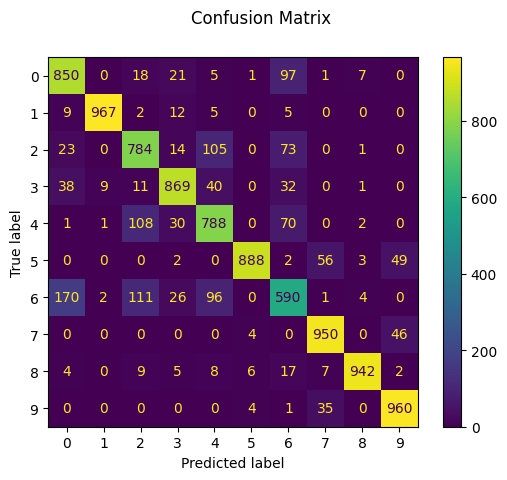

In [63]:
# Classification report
print(classification_report(y_test, y_pred))

# Plotting confusion matrix
confussion_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
confussion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()

**`KNN (svd_solver = 'randomized') , n_components = 0.95`**

In [64]:
#Pipeline with StandardScaler, PCA, and KNN - full(svd_solver)
knn_classifier_pipeline_randomized = Pipeline([
    ('std_dcaler', StandardScaler()),
    ('pca', PCA(random_state=42, svd_solver='randomized', n_components=pca.n_components_)),  # Use PCA for dimensionality reduction
    ('knn', KNeighborsClassifier())  #KNN Classifier
])
knn_classifier_pipeline_randomized

Pipeline(steps=[('std_dcaler', StandardScaler()),
                ('pca',
                 PCA(n_components=187, random_state=42,
                     svd_solver='randomized')),
                ('knn', KNeighborsClassifier())])

In [65]:
start_time_full = time.time()

# Train the pipeline on the training data
knn_classifier_pipeline_randomized.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier_pipeline_randomized.predict(x_test)

end_time_full = time.time()
print("Full PCA Runing Time :", end_time_full - start_time_full)

Full PCA Runing Time : 8.46845293045044


              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.75      0.78      0.77      1000
           3       0.89      0.87      0.88      1000
           4       0.75      0.80      0.77      1000
           5       0.98      0.88      0.93      1000
           6       0.66      0.59      0.62      1000
           7       0.90      0.95      0.92      1000
           8       0.98      0.94      0.96      1000
           9       0.91      0.96      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



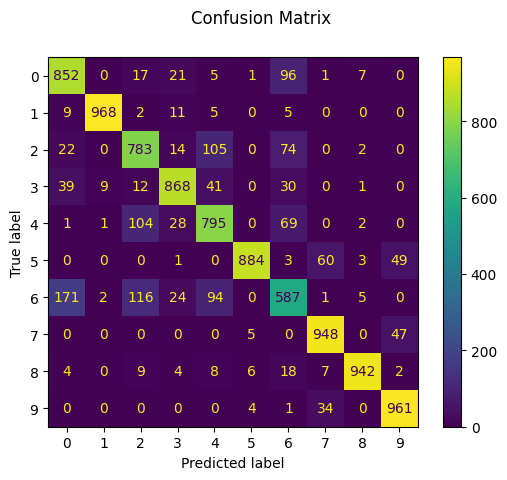

In [66]:
# Classification report
print(classification_report(y_test, y_pred))

# Plotting confusion matrix
confussion_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
confussion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()

**Explain Result**

Based on above results the running time of `Randomized` is decreased(3 seconds) based pm `Full` PCA.

but the accuracy is approximately equal. (Maybe it's related to classification algorithm)

<hr>

### **Answer -> Part(B)**

In [67]:
d = 10
# Full SVD Solver
start_time_full = time.time()
pca_full = PCA(n_components=d, svd_solver='full')
X_train_pca_full = pca_full.fit_transform(x_train)
X_test_pca_full = pca_full.transform(x_test)
end_time_full = time.time()

print("Full PCA Runing Time :",end_time_full - start_time_full)

# Randomized SVD Solver
start_time_randomized = time.time()
pca_randomized = PCA(n_components=d, svd_solver='randomized')
X_train_pca_randomized = pca_randomized.fit_transform(x_train)
X_test_pca_randomized = pca_randomized.transform(x_test)
end_time_randomized = time.time()

print("Randomized PCA Runing Time :",end_time_randomized - start_time_randomized)

Full PCA Runing Time : 6.604308605194092
Randomized PCA Runing Time : 2.070124864578247


**Explain Result**

It was almost expected that the execution time `randomized` PCA is less than `full` PCA.


The `randomized` PCA algorithm is designed to be computationally more efficient than the `full` PCA algorithm, especially when dealing with a large number of features. This efficiency gain comes from using randomization techniques that allow for a faster approximation of the principal components without computing the full covariance matrix.

<hr>

### **Answer -> Part(C) & Part(D)**

Incremental PCA is a variant of traditional Principal Component Analysis (PCA) designed for situations where the dataset is too large to fit into memory. It is a way of performing PCA on chunks or mini-batches of data rather than the entire dataset all at once. This makes Incremental PCA particularly useful for online learning systems or for very large datasets that cannot be loaded into memory.

**How Works :**

- **Divide Data into Batches:**

The data is divided into smaller batches that can comfortably fit into memory.

- **Partial Fit:**

Incremental PCA performs a 'partial fit' on each mini-batch rather than a 'fit' on the entire dataset.

- **Update Principal Components:**

After each partial fit, the principal components get updated, which means the final components are an approximation of the components that would have been obtained by running traditional PCA on the full dataset.

- **Data Transformation:** 

Once all mini-batches have been processed, the data can be transformed into the reduced-dimensional space based on the final principal components.

**Advantages**

- **Memory Efficiency:**

It's much more memory-efficient than traditional PCA.

- **Online Learning:**

Suitable for online machine learning models where you continue to receive new data points.
Limitations

- **Approximate Results:**

The principal components are approximations, which might be less accurate than the ones obtained from traditional PCA.
Computational Overhead:
 The continual update of components can result in increased computation time.

**Incremental PCA is highly useful in:** Real-time analytics , Streamed data processing , Large-scale machine learning tasks

In [68]:
from sklearn.decomposition import IncrementalPCA
import numpy as np

#I set number of components to 300
n_components = 300

# Create an Incremental PCA object
inc_pca = IncrementalPCA(n_components=n_components)

# Number of batches
n_batches = 200

# Perform Incremental PCA in batches
for X_batch in np.array_split(x_train, n_batches):
    inc_pca.partial_fit(X_batch)

# Transform the entire dataset using IPCA
X_reduced = inc_pca.transform(x_train)
X_reduced


array([[ -123.99377057,  1633.07443863, -1211.0415022 , ...,
            3.80396994,   -14.07309517,    -4.95667265],
       [ 1407.92885999,  -451.64133981,  -261.02699247, ...,
            5.79521217,    -7.5020423 ,   -50.8183307 ],
       [ -725.91079685, -1101.83814498,   106.15428558, ...,
           14.22035207,    10.12112812,     3.22755447],
       ...,
       [  857.75020318, -1180.24020844,  -520.69369934, ...,
           61.59552929,   -28.48586882,    37.98283281],
       [ -807.47652536,  -581.21887161,   480.31994528, ...,
            3.17932053,    25.90157212,    24.49591262],
       [-1815.66380215,  -119.74334574,   468.91366981, ...,
            5.54378452,   -68.66417676,   -23.67151284]])

In [69]:
X_reduced.shape

(60000, 300)

`numpy.array_split` is a function in the NumPy library that is used to split an array into multiple sub-arrays along a specified axis. It is particularly useful when we want to split a large array into smaller

<hr>

## <font color='#D61E85' size='+3'>**Q3:**</font> <font size='+2'> **Locally Linear Embedding** </font>

Locally linear embedding (LLE), is a nonlinear dimensionality reduction algorithm which is categorized as a manifold learning technique.

<font size='+1'>**(a)**</font> At first, try to explain how it works by mentioning its optimization objectives.

<font size='+1'>**(b)**</font> Now, it's time to implement it and trying to perform your implementation on a swiss roll to see what happens after unrolling. (try to plot your results)
The code below make you a swiss roll with $1000$ samples.

<font size='+1'>**(c)**</font> Finally use the LLE implementation provided by Scikit-learn to check the results of your implementation. (plot your results)

<font color='#8FCF26' size='+2'>**A3:**</font> Your explanations

**IN PART (B) I GET HELP FROM CHATGPT**

My prompt : lle from scratch implementation

but the chatgpt code have some errors and i corrected them.

### **Answer -> Part (A)**

`Locally Linear Embedding (LLE)` is a nonlinear dimensionality reduction technique used to map high-dimensional data into a lower-dimensional space while preserving the local structure of the data. It is a powerful method for manifold learning, a subset of unsupervised machine learning.

The main idea behind Locally Linear Embedding is to preserve the local linear relationships between neighboring data points. It assumes that the data lies on or near a smooth manifold in the high-dimensional space. LLE works in two main steps: `local weight estimation` and `global embedding`.

**Local Weight Estimation:**

For each data point, LLE identifies its $k$-nearest neighbors ($k$ is a user-defined parameter). It then computes the local weights for each neighbor to reconstruct the data point as a linear combination of its neighbors. The reconstruction error is minimized by adjusting the weights.

**Global Embedding:**

After computing the local weights, LLE seeks a lower-dimensional representation of the data while preserving the local relationships. It aims to find a set of lower-dimensional coordinates for each data point so that the local linear relationships in the high-dimensional space are approximately preserved in the lower-dimensional space.

*LLE can be mathematically described as follows:*

1. **Compute the weight matrix $W$:**
   - For each data point $x_i$, find its $k$-nearest neighbors, and represent them as $x_{i_1}, x_{i_2}, \ldots, x_{i_k}$.
   - For each $x_i$, compute the weights $(w_{i_1}, w_{i_2}, \ldots, w_{i_k})$ that minimize the reconstruction error: $\|x_i - \sum (w_{ij} \cdot x_{ij})\|^2$ subject to the constraint $\sum w_{ij} = 1$.

2. **Compute the embedding matrix $Y$:**
   - Represent the lower-dimensional coordinates of the data points as $Y = [y_1, y_2, \ldots, y_n]$, where $y_i$ is the lower-dimensional representation of $x_i$.

   - Compute the cost function that measures the difference between the local relationships in the high-dimensional space and the lower-dimensional space:
   
    $\|x_i - \sum (w_{ij} \cdot x_j)\|^2$.
    
   - Find $Y$ that minimizes the cost function by solving a linear system, such as an eigenvalue problem.

LLE has some desirable properties, including the ability to preserve local structures in the data, robustness to noise, and its potential to uncover the intrinsic geometry of the data manifold. However, it may suffer from some limitations, such as sensitivity to the choice of the parameter $k$ and difficulties in handling global distortions in the data manifold.


![](https://miro.medium.com/v2/resize:fit:640/format:webp/0*dey-qDexfQvENUrl.gif)

### **Answer -> Part (B)**

Shape of Swiss roll : (1000, 3)


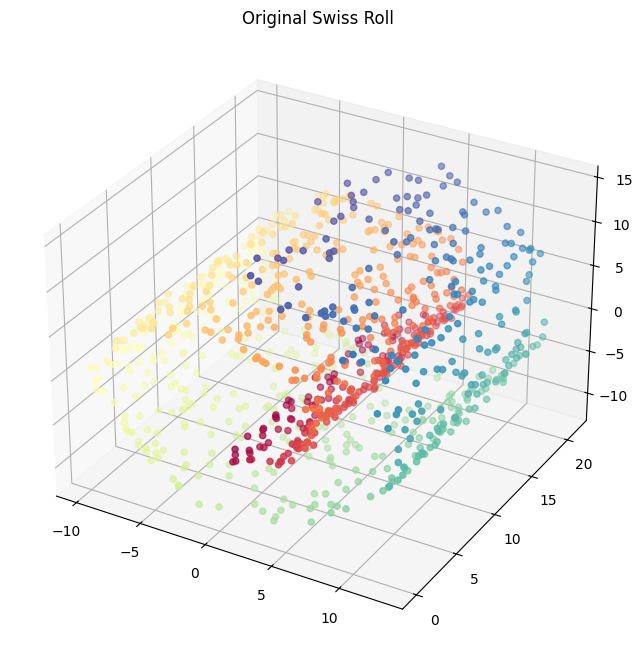

In [21]:
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

# Plot the original Swiss Roll
fig = plt.figure(figsize=(20, 8))
#
print("Shape of Swiss roll :", X_swiss.shape)
# Plot 3D Swiss Roll
ax1 = fig.add_subplot(121, projection='3d');
ax1.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=t, cmap=plt.cm.Spectral);
ax1.set_title('Original Swiss Roll');

The function returns an array where each row contains the indices of the nearest neighbors for the corresponding point.

In [43]:
from scipy.spatial.distance import cdist
import numpy as np

def find_neighbors(X, n_neighbors):
    # computes the pairwise Euclidean distances between all points in the dataset X.
    distances = cdist(X, X)
    # finds the indices of the nearest neighbors for each point (excluding itself).
    neighbors = np.argsort(distances, axis=1)[:, 1:n_neighbors+1]
    return neighbors

The function returns an array where each row contains the weights for the corresponding point.

In [44]:
def compute_weights(X, neighbors, n_neighbors, reg=1e-3):
    m = X.shape[0]
    weights = np.zeros((m, n_neighbors))

    for i in range(m):
        # computes the difference between the current point and its neighbors.
        xi = X[neighbors[i]] - X[i]
        # computes the covariance matrix of the differences.
        C = np.dot(xi, xi.T) + reg * np.eye(xi.shape[0])
        # solves a linear system to find weights that minimize the reconstruction error.
        w = np.linalg.solve(C, np.ones(n_neighbors))
        # normalizes the weights to ensure they sum to 1.
        w /= w.sum()
        # update weights
        weights[i] = w

    return weights


LLE from scratch

In [45]:
def locally_linear_embedding(X, n_neighbors, n_components):
    neighbors = find_neighbors(X, n_neighbors)
    weights = compute_weights(X, neighbors)

    m = X.shape[0]
    # is a sparse weight matrix based on the computed weights.
    W = np.zeros((m, m))

    for i in range(m):
        W[i, neighbors[i]] = weights[i]

    # is a matrix used to find the eigenvectors associated with the smallest eigenvalues.
    M = np.eye(m) - W
    # computes the eigenvalues and eigenvectors of the matrix M.T * M.
    eigvals, eigvecs = np.linalg.eigh(np.dot(M.T, M))

    # finds the indices of the smallest eigenvalues (excluding the smallest, which corresponds to the trivial constant eigenvector).
    indices = np.argsort(eigvals)[1:n_components + 1]
    # extracts the corresponding eigenvectors as the final embedding.
    embedding = eigvecs[:, indices]

    return embedding


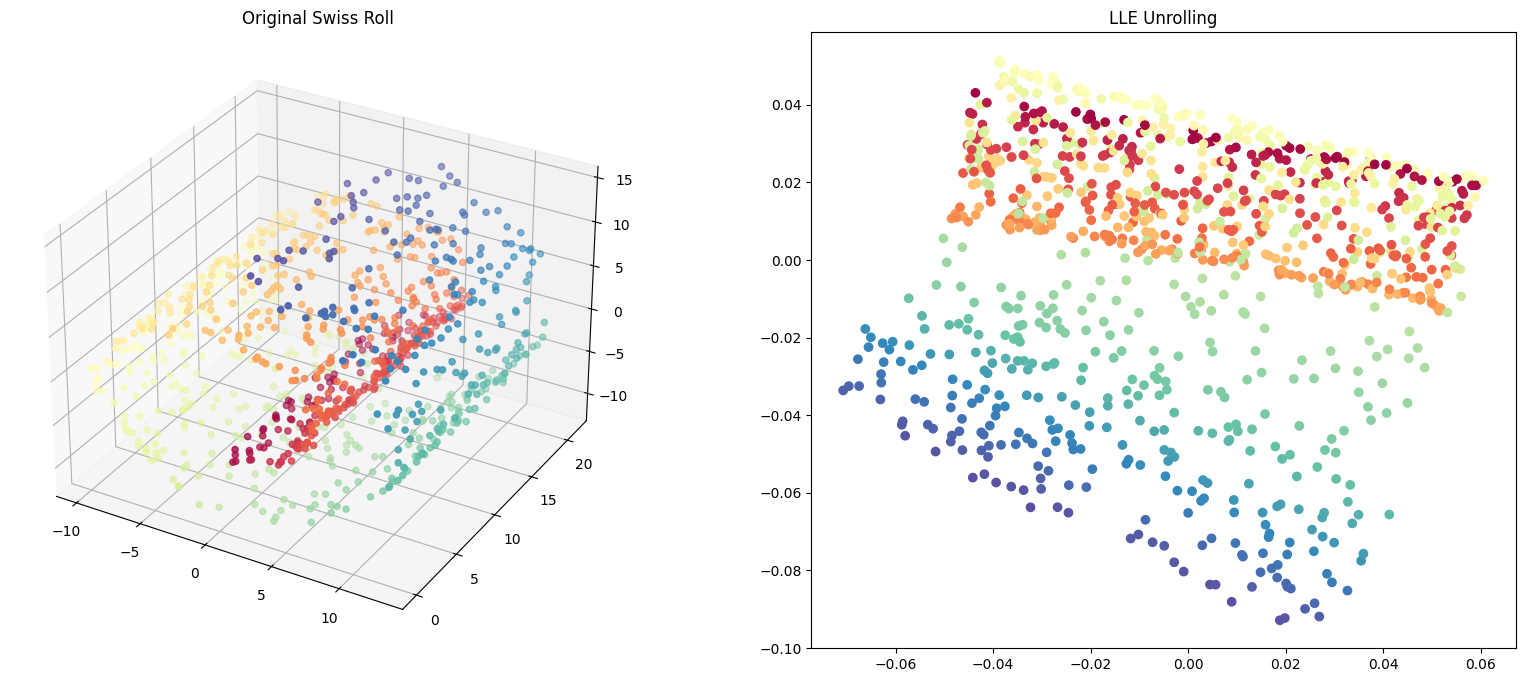

In [48]:
# Specify LLE parameters
n_neighbors = 12
n_components = 2

# Apply Locally Linear Embedding
X_lle = locally_linear_embedding(X_swiss, n_neighbors, n_components)

# Plot the original Swiss Roll
fig = plt.figure(figsize=(20, 8))

# Plot 3D Swiss Roll
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=t, cmap=plt.cm.Spectral)
ax1.set_title('Original Swiss Roll')

# Plot 2D LLE representation
ax2 = fig.add_subplot(122)
ax2.scatter(X_lle[:, 0], X_lle[:, 1], c=t, cmap=plt.cm.Spectral)
ax2.set_title('LLE Unrolling')

plt.show()

### **Answer -> Part (C)**

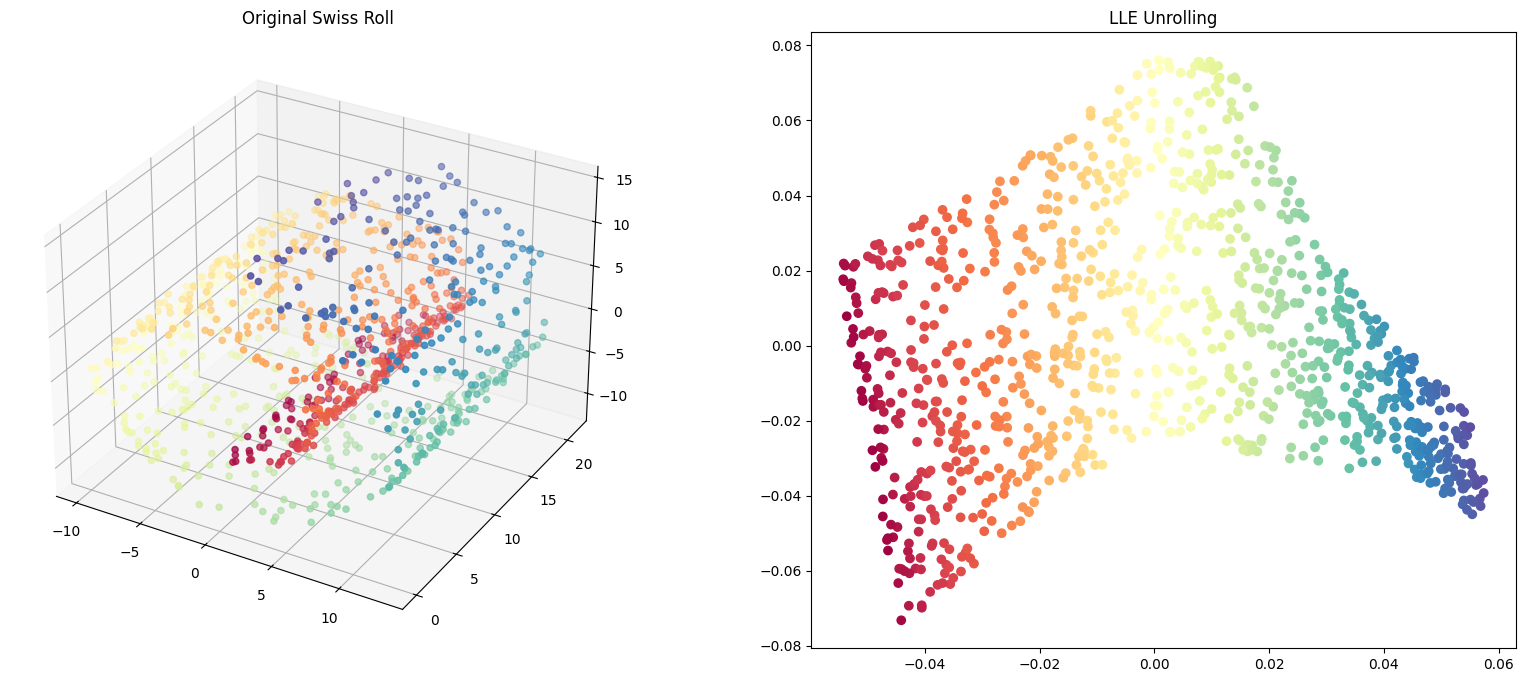

In [50]:
from sklearn.manifold import LocallyLinearEmbedding

# Apply Locally Linear Embedding
lle = LocallyLinearEmbedding(n_neighbors=12, n_components=2)
X_lle = lle.fit_transform(X_swiss)

# Plot the original Swiss Roll
fig = plt.figure(figsize=(20, 8))

# Plot 3D Swiss Roll
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=t, cmap=plt.cm.Spectral)
ax1.set_title('Original Swiss Roll')

# Plot 2D LLE representation
ax2 = fig.add_subplot(122)
ax2.scatter(X_lle[:, 0], X_lle[:, 1], c=t, cmap=plt.cm.Spectral)
ax2.set_title('LLE Unrolling')

plt.show()

<hr>

## <font color='#D61E85' size='+3'>**Q4:**</font> <font size='+2'> **t-SNE vs. UMAP ‎️‍🔥** </font>

In this question we need the first $5000$ images of Fashion-MNIST dataset. We want to reduce the dimension of these samples down to 2 so we can plot them. Here, we use t-SNE and UMAP to perform these reductions. You can use scatterplot with 10 different colors to demonstrate the class of each instance. After visulaization try to analyze your results and compare them with each other. Is there any pattern in these visualizations?

<font color='#8FCF26' size='+2'>**A4:**</font> Your explanations

**Import Libraries**

In [20]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import umap


**Reading Data**

Shape of Dataset: (5000, 28, 28)


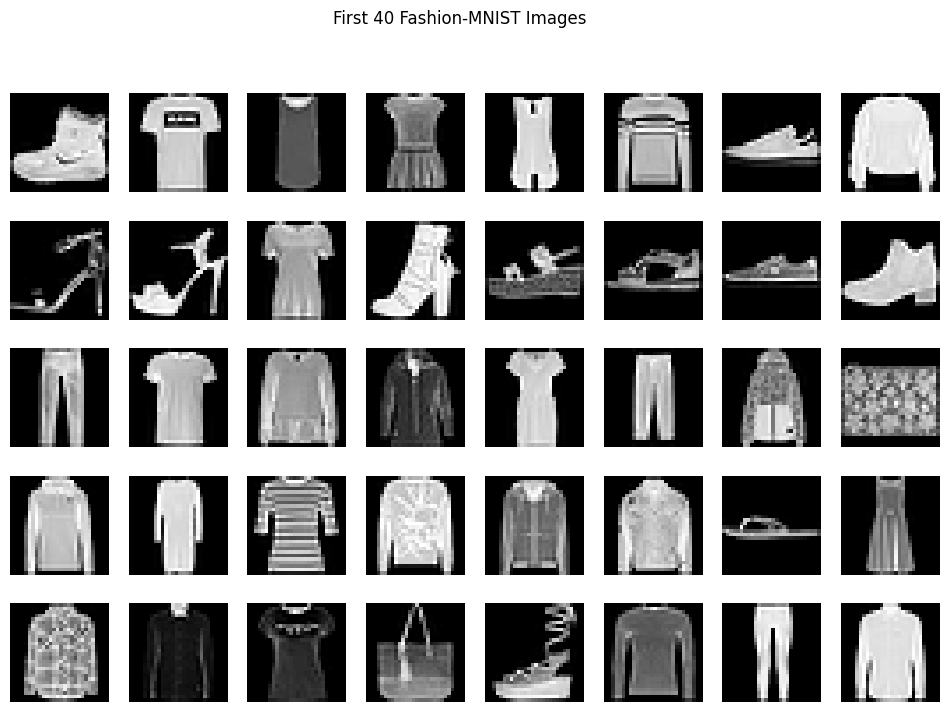

In [21]:
# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Select the first 5000 images
first_5000_images = x_train[:5000]

# Print the shape of the subset
print("Shape of Dataset:", first_5000_images.shape)

reshaped_images = first_5000_images.reshape((-1, 28, 28))
# Plot the first 40 images in a 5x8 grid
plt.figure(figsize=(12, 8))
for i in range(40):
    plt.subplot(5, 8, i + 1)
    plt.imshow(reshaped_images[i], cmap='gray')
    plt.axis('off')

plt.suptitle('First 40 Fashion-MNIST Images')
plt.show()

d:\Teias\Usage\Term-1\Machine Learning\Assignments\env\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


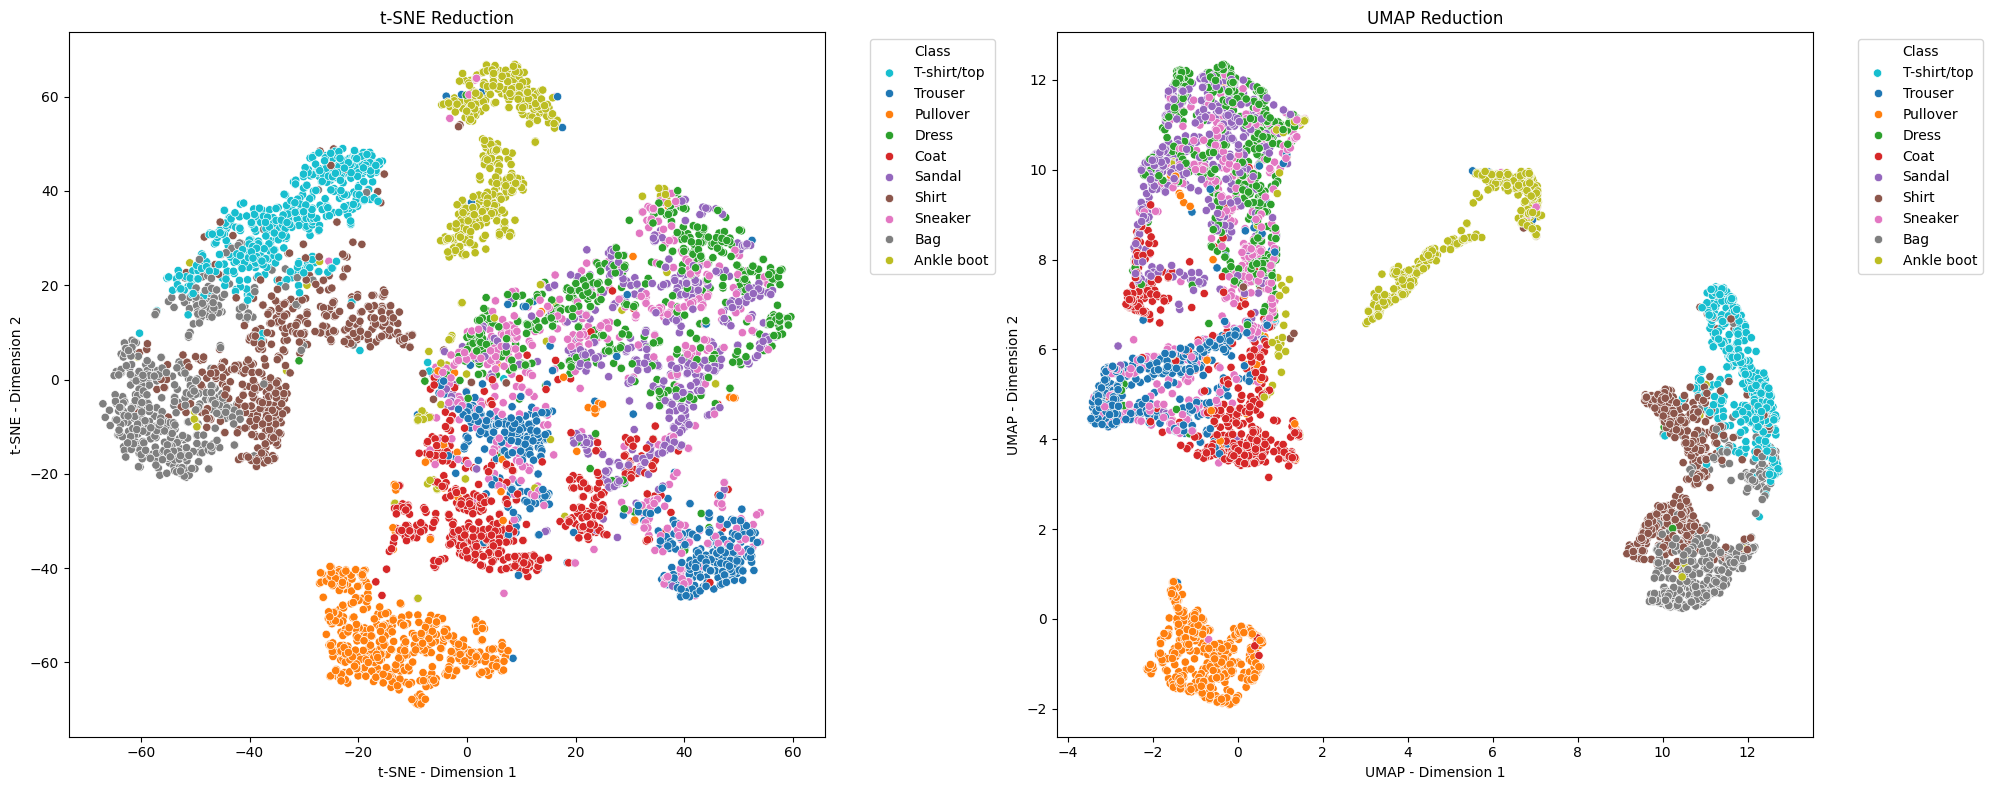

In [24]:
# Flatten the images to one-dimensional arrays
flattened_images = first_5000_images.reshape((5000, -1))

# Use labels for all 5000 images
labels = y_train[:5000]

# Define class names for Fashion-MNIST
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
tsne_result = tsne.fit_transform(flattened_images)

# UMAP dimensionality reduction
umap_model = umap.UMAP(n_components=2, random_state=42, n_jobs=-1)
umap_result = umap_model.fit_transform(flattened_images)

# Plot t-SNE result
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=labels, palette='tab10', legend='full')
plt.title('t-SNE Reduction')
plt.xlabel('t-SNE - Dimension 1')
plt.ylabel('t-SNE - Dimension 2')

# Show class names in the legend
plt.legend(title="Class", labels=class_names, bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot UMAP result
plt.subplot(1, 2, 2)
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=labels, palette='tab10', legend='full')
plt.title('UMAP Reduction')
plt.xlabel('UMAP - Dimension 1')
plt.ylabel('UMAP - Dimension 2')

# Show class names in the legend
plt.legend(title="Class", labels=class_names, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


**Result Explaination**

 Both of these techniques are used for visualization of high-dimensional data in a lower-dimensional space(typically 2D for easy visualization)

**t-SNE Result Analysis:**

- The t-SNE visualization shows distinct clusters of data points, with some clusters appearing very tightly packed. This indicates that within these clusters, the items are very similar to each other according to the t-SNE similarity metric.

- Some classes are well-separated(for example : Ankle boot , Pull over), which suggests that these items are significantly different from items in other clusters, at least in the context of the features that t-SNE is considering.

- The distance between clusters in t-SNE does not have a meaningful interpretation. For instance, two clusters being far apart does not necessarily mean that the items are more dissimilar than items in clusters that are closer together; it is the relative positions within a cluster that carry more meaning.

**UMAP Result Analysis:**

- UMAP also shows clusters, but the separation between them is not as pronounced as in t-SNE. This is because UMAP tries to preserve more of the global structure of the data.

- The clusters in UMAP might appear closer or even connected, which suggests that while the items in different clusters are distinct, they may share some similarities or have a continuum in terms of the underlying features.

- In UMAP, the relative distances are more meaningful, and clusters being closer to each other can be interpreted as those classes being more similar in the high-dimensional space.

<hr>

## <font color='#D61E85' size='+3'>**Q5:**</font> <font size='+2'> **Iris** </font>

You will take a shortcut and load the Iris dataset from Scikit-learn’s datasets module. Furthermore, you will only select two features, sepal width and petal length, to make the classification task more challenging for illustration purposes

In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.ensemble import VotingClassifier

In [18]:
# Load the Iris dataset
iris = datasets.load_iris()

# Extract sepal width and petal length features
X = iris.data[:, 0:2]

# Use the target variable as the class labels
y = iris.target

split the Iris examples into 50 percent training and 50 percent test data:

In [19]:
# Split the dataset into training and testing sets (50% training, 50% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

Using the training dataset, you now will train three different classifiers:

- Logistic regression classifier

- Decision tree classifier

- k-nearest neighbors classifier

you will then evaluate the model performance of each classifier via 10-fold cross-validation on the training dataset before combining them into an ensemble classifier:

Logistic Regression Mean Accuracy: 0.7732142857142857
Decision Tree Mean Accuracy: 0.6392857142857143
k-Nearest Neighbors Mean Accuracy: 0.775

Ensemble Classifier Accuracy on Test Data: 0.8133333333333334
Ensemble Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.70      0.70      0.70        23
           2       0.70      0.70      0.70        23

    accuracy                           0.81        75
   macro avg       0.80      0.80      0.80        75
weighted avg       0.81      0.81      0.81        75



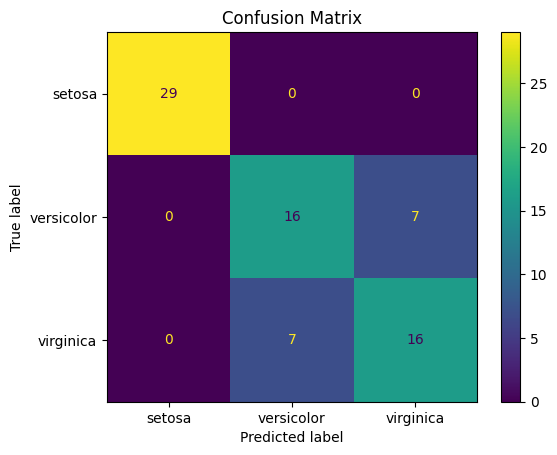

In [24]:
# Create pipelines for each classifier
logistic_regression_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

decision_tree_pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier())
])

knn_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

# Evaluate models via 10-fold cross-validation
logistic_regression_scores = cross_val_score(logistic_regression_pipeline, X_train, y_train, cv=10)
decision_tree_scores = cross_val_score(decision_tree_pipeline, X_train, y_train, cv=10)
knn_scores = cross_val_score(knn_pipeline, X_train, y_train, cv=10)

# Display mean accuracy scores for each classifier
print("Logistic Regression Mean Accuracy:", logistic_regression_scores.mean())
print("Decision Tree Mean Accuracy:", decision_tree_scores.mean())
print("k-Nearest Neighbors Mean Accuracy:", knn_scores.mean())
print()
# Combine classifiers into an ensemble classifier
ensemble_classifier = VotingClassifier(estimators=[
    ('logistic_regression', logistic_regression_pipeline),
    ('decision_tree', decision_tree_pipeline),
    ('knn', knn_pipeline)
])

# Train the ensemble classifier
ensemble_classifier.fit(X_train, y_train)

# Evaluate ensemble model on the test dataset
ensemble_accuracy = ensemble_classifier.score(X_test, y_test)
print("Ensemble Classifier Accuracy on Test Data:", ensemble_accuracy)

# Predictions on the test dataset
y_pred = ensemble_classifier.predict(X_test)

# Evaluate ensemble model with a classification report
print("Ensemble Classifier Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
cm_display = ConfusionMatrixDisplay.from_estimator(ensemble_classifier, X_test, y_test, display_labels=iris.target_names)
plt.title("Confusion Matrix")
plt.show()


**Explain Result**

From above result we can see that our Accuracy is increased after we use Ensemble method :

`Logistic Regression Accuracy` -> 0.77

`Decision Tree Accuracy` -> 0.63

`KNN Accuracy` -> 0.775

==

`Ensemble Classifier Accuracy` -> 0.81

It showed that when we used an ensemble technic the accuracy our accuracy was increased.

Because by combining the predictions of multiple models, they can capture different aspects of the data, leading to more robust and accurate predictions

<hr>

## <font color='#D61E85' size='+3'>**Q6:**</font> <font size='+2'> **Carseats** </font>

#### Ensemble Learning

Ensemble learning is a machine learning technique that involves combining the predictions of multiple models to improve the overall performance and accuracy of a system. Instead of relying on a single model to make predictions, ensemble methods use a group of models and aggregate their predictions to achieve better results than any individual model could achieve on its own.

The basic idea behind ensemble learning is that by combining the strengths of different models, it is possible to mitigate the weaknesses of each individual model. Ensemble methods are often used to enhance predictive accuracy, reduce overfitting, and improve the robustness of the model.

There are several popular ensemble learning techniques, including:

**Bagging (Bootstrap Aggregating):** This method involves training multiple instances of the same learning algorithm on different subsets of the training data, typically created by random sampling with replacement. The predictions of these models are then averaged or voted upon to make the final prediction.

**Boosting:** Boosting focuses on training a sequence of weak learners, where each subsequent model corrects the errors of its predecessor. Popular boosting algorithms include AdaBoost (Adaptive Boosting) and Gradient Boosting.

**Random Forest:** Random Forest is an ensemble method based on bagging. It constructs multiple decision trees during training and combines their predictions through averaging or voting. Each tree in the forest is trained on a random subset of the features.

Stacking: Stacking involves training multiple diverse models and using another model (meta-model or blender) to combine their predictions. The predictions of individual models serve as input features for the meta-model.

Ensemble learning is a powerful technique that is widely used in various machine learning applications. It is particularly effective when dealing with complex and diverse datasets, as well as when individual models may have different strengths and weaknesses.

We are going to work with **Carseats** dataset. We want to predict the sales using regression trees and related approaches, treating the response as a quantitative variable.

- Load Dataset

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingRegressor
import seaborn as sns

- Do preprocess
- Split the data set into a training set and a test set.

**Reading dataset**

In [27]:
carseats = pd.read_csv('./Carseats.csv')
carseats.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

<hr>

**Pre-Processiong**

We can see we dont have any null values , It's good , but we must do preprocesing on some features.

In [28]:
carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


We don't have any duplicated values

In [29]:
carseats[carseats.duplicated()]

Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []

Some features are non-numerical (`US` , `Urban` and `ShelveLoc`) we must changed it to numerical.

In [30]:
carseats.US.value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [31]:
carseats.Urban.value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [32]:
carseats.ShelveLoc.value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

For `ShelveLoc` column we use `Ordinal Encoding` , because :

This is suitable when there is a meaningful order among the categories.



For `US` and `Urban` columns we use `One-hot Encoding` , because :

This is suitable when there is no inherent order among the categories.

In [37]:
# Ordinal encoding for "ShelveLoc"
shelve_loc_encoder = LabelEncoder()
carseats["ShelveLoc"] = shelve_loc_encoder.fit_transform(carseats["ShelveLoc"])

# One-hot encoding for "Urban" and "US"
one_hot_encoder = OneHotEncoder(drop="first", sparse_output=False)
urban_us_encoded = one_hot_encoder.fit_transform(carseats[["Urban", "US"]])

# Create new column names
urban_us_columns = one_hot_encoder.get_feature_names_out(["Urban", "US"])

# Add the new columns to the dataframe
carseats[urban_us_columns] = urban_us_encoded

# Drop the original "Urban" and "US" columns
carseats.drop(["Urban", "US"], axis=1, inplace=True)

carseats.head()


Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          0   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          0   38   

   Education  Urban_Yes  US_Yes  
0         17        1.0     1.0  
1         10        1.0     1.0  
2         12        1.0     1.0  
3         14        1.0     1.0  
4         13        1.0     0.0

**Split Train & Test**

In [38]:
X = carseats.drop('Sales', axis=1)
y = carseats['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (320, 10)
X_test shape: (80, 10)
y_train shape: (320,)
y_test shape: (80,)


<hr>

- Fit a regression tree to the training set. Plot the tree, and interpret
the results. What test MSE do you obtain?

MSE of Test Data (Decision Tree): 5.51592875


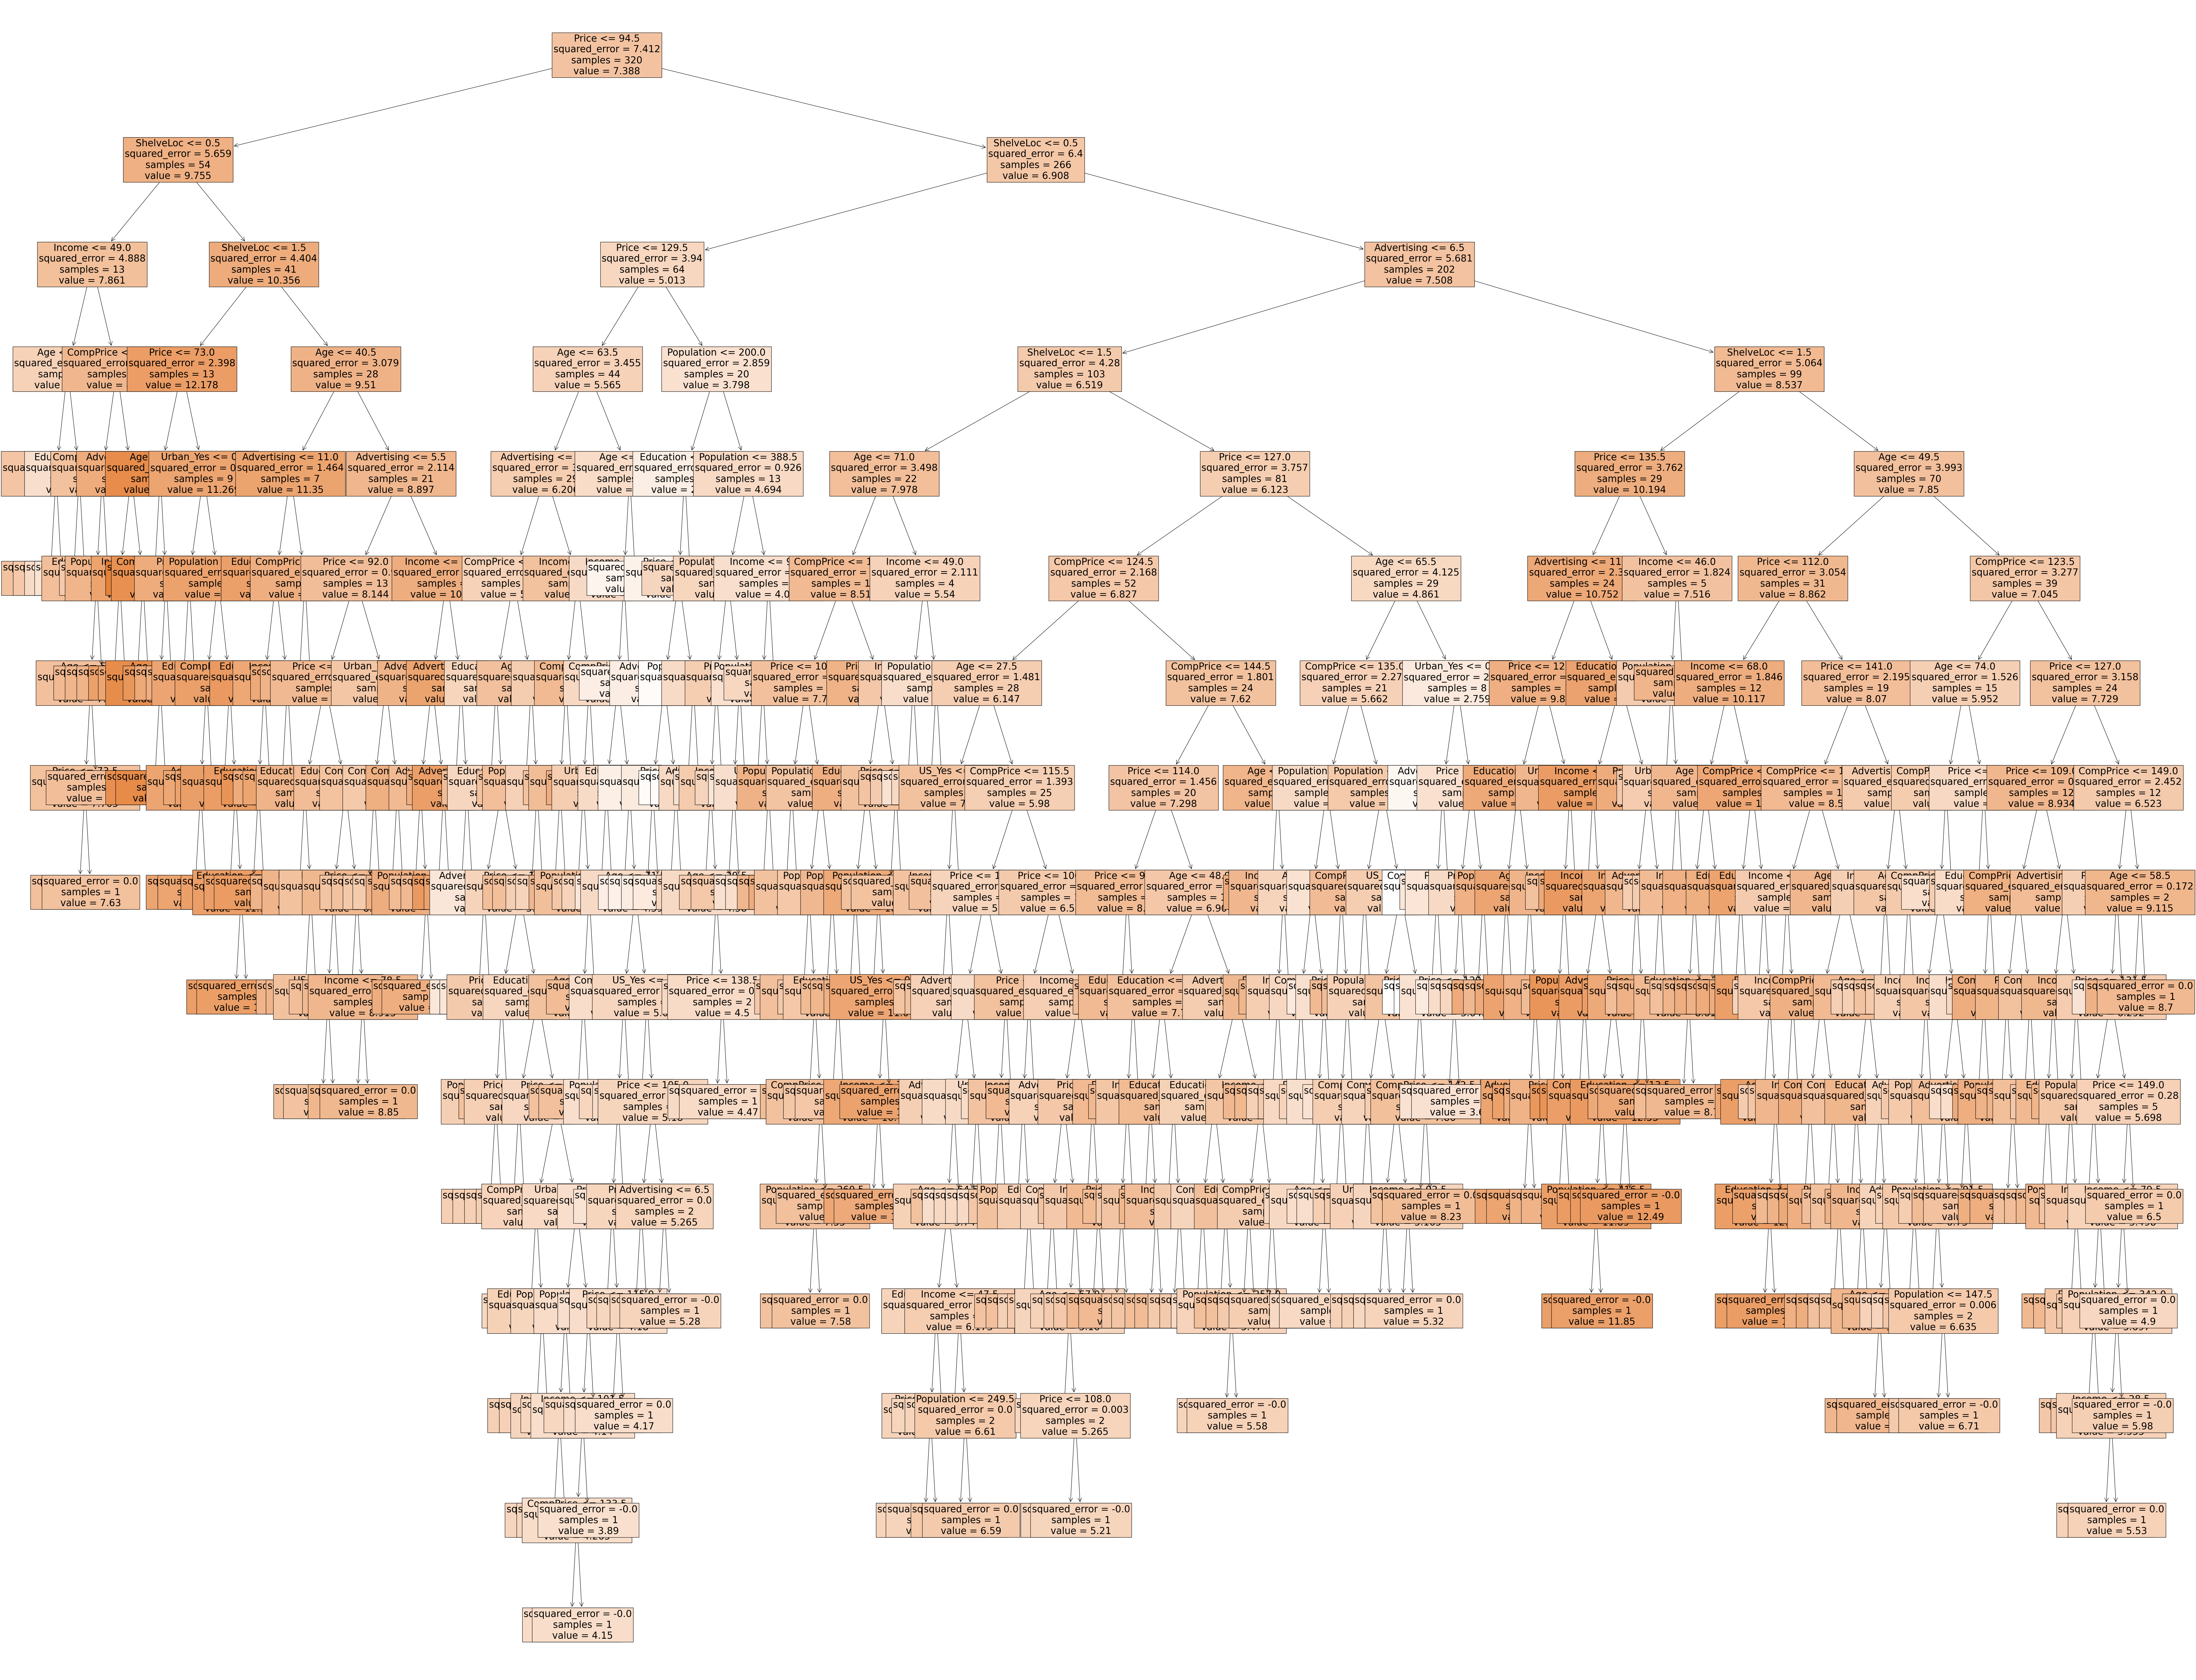

In [57]:
# Fit a decision tree regressor
regression_tree = DecisionTreeRegressor(random_state=42)
regression_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = regression_tree.predict(X_test)

# Calculate mean squared error on the test set
mse = mean_squared_error(y_test, y_pred)

# Print the test MSE
print("MSE of Test Data (Decision Tree):", mse)

# Set up the plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(100, 80))

# Plot the decision tree
plot_tree(regression_tree, feature_names=X.columns, filled=True, fontsize=25, ax=axes)

# Display the plot
plt.show()

<hr>

- Use the bagging approach in order to analyze this data. What test MSE do you obtain? which variables are most important. visualize them

MSE of Test Data (Bagging): 3.1615284669999992


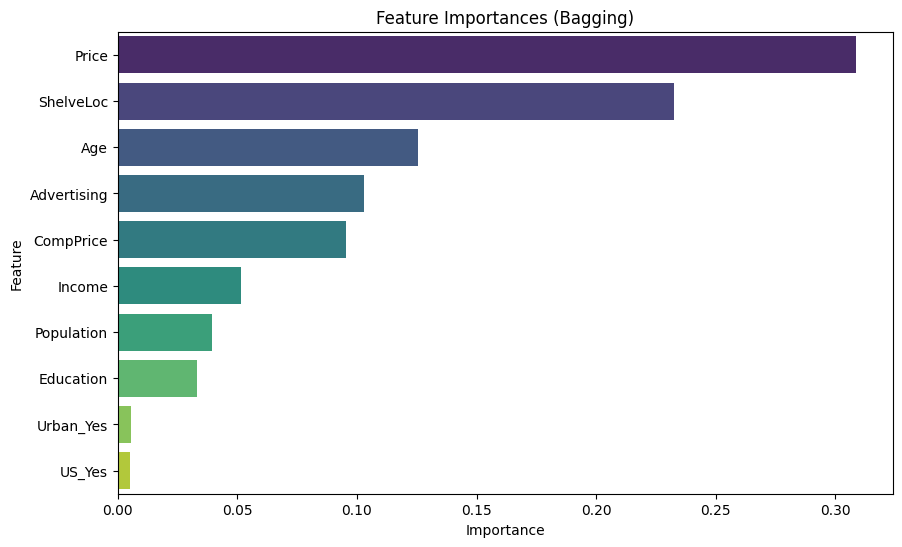

In [58]:
# Create a base model (decision tree regressor)
base_regression_model = DecisionTreeRegressor(random_state=42)

# Create a bagging regressor
bagging_model = BaggingRegressor(base_regression_model, n_estimators=100, random_state=42)

# Fit the bagging model on the training data
bagging_model.fit(X_train, y_train)

# Predict on the test set
y_pred_bagging = bagging_model.predict(X_test)

# Calculate mean squared error on the test set
mse_bagging = mean_squared_error(y_test, y_pred_bagging)

# Print the test MSE
print("MSE of Test Data (Bagging):", mse_bagging)

# Get feature importances from the bagging model
feature_importances = np.mean([tree.feature_importances_ for tree in bagging_model.estimators_], axis=0)

# Create a DataFrame to visualize feature importances
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis', hue='Feature', dodge=False, legend=False)
plt.xlabel('Importance')
plt.title('Feature Importances (Bagging)')
plt.show()


The `MSE` in this part is decreased based on above part (Decision Tree)

When we observe a decreasing MSE, it means that the model's predictions are getting closer to the actual values over time or across different iterations of the training process. 

<hr>

- Use random forests to analyze this data. What test MSE do you obtain?  which variables are most important. Describe the effect of m, the number of variables considered at each split, on the error rate obtained.

MSE of Test Data (Random Forest): 3.134049049999999


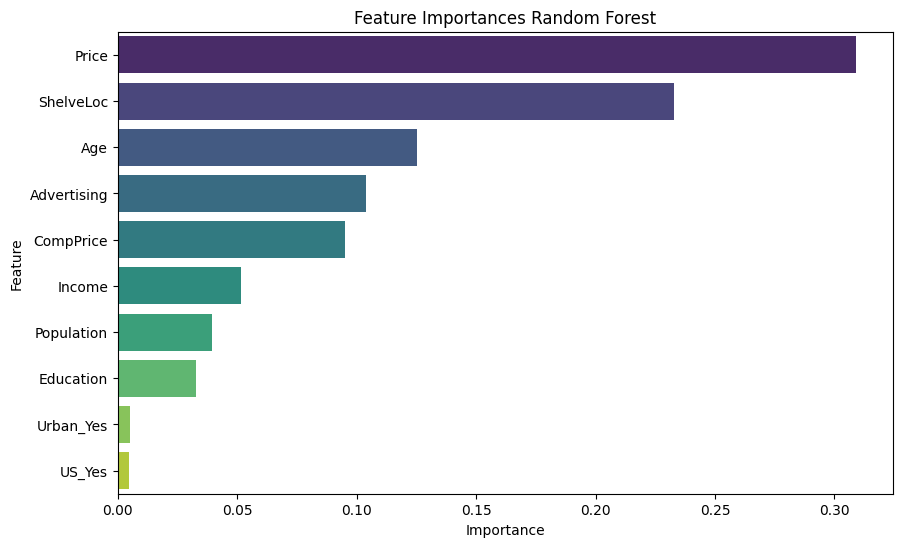

In [59]:
# Create a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the Random Forest model on the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_random_forest = rf_regressor.predict(X_test)

# Calculate mean squared error on the test set
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)

# Print the test MSE
print("MSE of Test Data (Random Forest):", mse_random_forest)

# Get feature importances from the Random Forest model
feature_importances_rf = rf_regressor.feature_importances_

# Create a DataFrame to visualize feature importances
importances_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_rf})
importances_df_rf = importances_df_rf.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df_rf, palette='viridis', hue='Feature', dodge=False, legend=False)
plt.xlabel('Importance')
plt.title('Feature Importances Random Forest')
plt.show()


The `MSE` in this part is decreased based on above part (Bagging)

When we observe a decreasing MSE, it means that the model's predictions are getting closer to the actual values over time or across different iterations of the training process. 

The parameter `m` in the context of Random Forests refers to the number of variables considered at each split. (`max_features`)
1. **Larger `max_features` (considering more variables):**
   - Pros:
     - The individual trees in the forest may have more information to split on, potentially capturing more complex patterns in the data.
     - The model might have higher expressiveness.
   - Cons:
     - The trees in the forest might become more correlated because they have a higher chance of considering the same set of features during splits.
     - This correlation could lead to overfitting, especially if the dataset has noise.

2. **Smaller `max_features` (considering fewer variables):**
   - Pros:
     - The trees in the forest are more likely to be diverse because they consider different subsets of features during splits.
     - The model may be more robust and generalize better to new data.
   - Cons:
     - Each individual tree may not capture complex patterns in the data as effectively.
     - The model may have lower expressiveness.

3. **Optimal `max_features`:**
   - The optimal value for `max_features` depends on the specific dataset and problem.


**Hyperparameter tuning (Just for max_features)**

In [63]:
# Define the hyperparameter grid to search (only for 'max_features')
param_grid = {
    'max_features': ['sqrt', 'log2', None, 0.5, 0.7]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_test = best_rf_model.predict(X_test)

# Calculate mean squared error on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
print("Test MSE with Best Model:", mse_test)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters: {'max_features': None}
Test MSE with Best Model: 3.134049049999999


**max_features:**

The maximum number of features considered for splitting a node.

Controls the number of features the algorithm considers for each split. Smaller values can lead to more diverse trees, reducing overfitting, while larger values may capture more information but increase the risk of overfitting.

setting `max_features` to None means that the algorithm considers all features for splitting at each node. When `max_features` is set to None, it allows each tree in the random forest to use all available features when making decisions during the splitting process.